# importing libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from skimpy import skim 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
import re

# manually data extract

In [3]:
url = 'https://www.shine.com/job-search/jobs?job_type=2&top_companies_boost=true&sort=1'
page=requests.get(url,"html",headers=headers)
page

<Response [200]>

In [5]:
url

'https://www.shine.com/job-search/jobs?job_type=2&top_companies_boost=true&sort=1'

In [7]:
soup = BeautifulSoup(page.content, 'html.parser')

In [9]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://staticcand.shine.com/" rel="preconnect"/>
  <link href="https://analytics.htmedia.in/" rel="preconnect"/>
  <link href="https://connect.facebook.net/" rel="dns-prefetch"/>
  <link href="https://www.googletagmanager.com/" rel="dns-prefetch"/>
  <link href="https://www.google-analytics.com/" rel="dns-prefetch"/>
  <link href="https://www.staticlearn.shine.com/" rel="preconnect"/>
  <link href="https://www.staticrect.shine.com/" rel="preconnect"/>
  <meta charset="utf-8"/>
  <title>
   jobs - 100 Active  Jobs Openings (Nov 2024) - Shine.com
  </title>
  <meta content="no-referrer-when-downgrade" name="referrer"/>
  <meta content="CLeifnVzr4Dvq72BEsrextjCUvsRrfK-xATKdFhIZrM" name="google-site-verification"/>
  <meta content="ALL" name="robots"/>
  <meta content="no-cache" name="pragma"/>
  <meta content="1 day" name="revisit-after"/>
  <meta content="GLOBAL" name="distribution"/>
  <meta content="document" name="resource-type"/

In [10]:
# job_title
job_title=soup.find_all("strong",attrs={"class":"jobCard_pReplaceH2__xWmHg"})
for i in job_title:
    print(i.text)

Customer Support Representative
Customer Service Manager
Relationship Manager
Relationship Manager Walking Interview at Rajkot (RBL B ...
Hr Recruiter
Customer Care Representative
Hiring for Business Relationship Manager
Recruitment Associate
Java Ui Developer
Field Executive
Dot Net Developer
rebar detailer
Banca Relationship Manager
CUSTOMER SERVICE
Branch Executive
Tele Caller
Telecaller
Purchase Executive
Ar Caller payment following
Customer Support Advisor


In [13]:
# firm name
firm=soup.find_all("div",attrs={"class":"jobCard_jobCard_cName__mYnow"})
for i in firm:
    print(i.text)

Tech Mahindra Ltd.
GRAMPRO BUSINESS SERVICES PRIVATE L...
ADITYA BIRLA SUN LIFE INSURANCE COM...
RBL BANK LIMITED
Shankar Hiring For Hr Recruiter
G and R Management Consultancy pvt ...
RELIANCE NIPPON LIFE INSURANCE COMP...
Adept Consulting Partners LLP
Sunil Kumar Hiring For SKS
Willpower Consultants Hiring For UN...
Willpower Consultants Hiring For Wi...
CONSERVE SOLUTIONS LLP
SHIVANT HR CONSULTANCY
Wehire Talent Solutions
EDUPRIZM INFOTECH PRIVATE LIMITED
My Money Fintech Solution
KALYANI MOTORS PRIVATE LIMITED.
Roswalt Buildcon Pvt. Ltd
Starworth Global Solutions
Square Business Services Pvt. Ltd.


In [15]:
#location
location=soup.find_all("div",attrs={"class":"jobCard_jobCard_lists_item__YxRkV jobCard_locationIcon__zrWt2"})

for i in location:
    print(i.text)

Hyderabad
Bilaspur+1Raipur
Delhi
Rajkot
Pondicherry
Chandigarh
Noida
Mumbai City
Bangalore+5Australia, Chennai, Hyderabad, Gurugram, Delhi
Mumbai City
Mumbai City
Chennai
Delhi
Navi Mumbai+1Mumbai City
Gaya+6Begusarai, Buxar, Rohtas, Siwan, Lakhisarai, Patna
Noida
Hyderabad
Mumbai City
Coimbatore
Hyderabad


In [17]:
#experiance
experiance=soup.find_all("div",attrs={"class":"jobCard_jobCard_lists_item__YxRkV jobCard_jobIcon__3FB1t"})

for i in experiance:
    print(i.text)

1 to 4 Yrs
4 to 9 Yrs
1 to 6 Yrs
2 to 7 Yrs
0 to 3 Yrs
0 to 4 Yrs
1 to 6 Yrs
2 to 5 Yrs
5 to 10 Yrs
0 to 1 Yr
2 to 4 Yrs
3 to 8 Yrs
1 to 6 Yrs
1 to 6 Yrs
0 Yrs
1 to 2 Yrs
0 to 1 Yr
3 to 4 Yrs
0 to 2 Yrs
0 Yrs


In [19]:
#job_requirement
requirement=soup.find_all("div",attrs={"class":"jobCard_skillList__KKExE"})
for i in requirement:
    print(i.text)

+4reading,  customer service,  hindi, speaking
+3loan sales,  team handling,  branch handling
+8cross-sell,  banca sales,  life insurance,  bancassurance,  cross sales,  banca,  insurance,  bancassurance sales
+10sales,  relationship marketing,  insurance sales,  relationship management,  branch banking,  tpp,  acquisition,  casa,  portfolio management,  banking
+3hr,  hr administration,  hr operations
+3non voice,  chat process,  international bpo
+4agency development,  health insurance,  life insurance,  broking
+6screening,  recruitment,  hiring,  sourcing,  head hunting,   posting
+3sql,  mysql,  java
+6communication skills,  problem solving,  b2b collection,  b2c,  adaptability,  time management
+3c#,  sql server, dot net
+7autocad,  bbs,  rebar, cadsrc,  rgscad,  shopdrawing,  rebarcad
+4banca,  casa,  insurance,  sales
+5customer retention,  customer relationship,  client handling, customer serviceinbound calls,  customer service manager
+10accounting,  interpersonal skills,  ba

In [21]:
#position
position=soup.find_all("div",attrs={"class":"jobCard_jobCard_lists_item__YxRkV jobCard_positionIcon__2hhkm"})
for i in position:
    print(i.text)

30 Positions
15 Positions
5 Positions
10 Positions
10 Positions
99 Positions
2 Positions
10 Positions
10 Positions
99 Positions
50 Positions
20 Positions
40 Positions
99 Positions


In [23]:
get_job_title=soup.find("strong",attrs={"class":"jobCard_pReplaceH2__xWmHg"}).text
get_job_title

'Customer Support Representative'

In [25]:
# one page data extract
link=soup.find_all("meta",{"itemprop":"url"})
job_links=[]
for i in link:
    job_links.append(i.get("content"))

job_links

['https://www.shine.com/jobs/customer-support-representative/tech-mahindra-ltd/16130789',
 'https://www.shine.com/jobs/customer-service-manager/grampro-business-services-private-limited/16130741',
 'https://www.shine.com/jobs/relationship-manager/aditya-birla-sun-life-insurance-company-limited/16130726',
 'https://www.shine.com/jobs/relationship-manager-walking-interview-at-rajkot-rbl-bank/rbl-bank-limited/16130716',
 'https://www.shine.com/jobs/hr-recruiter/shankar/16130671',
 'https://www.shine.com/jobs/customer-care-representative/g-and-r-management-consultancy-pvt-ltd/16088607',
 'https://www.shine.com/jobs/hiring-for-business-relationship-manager/reliance-nippon-life-insurance-company-limited/16088770',
 'https://www.shine.com/jobs/recruitment-associate/adept-consulting-partners-llp/16031366',
 'https://www.shine.com/jobs/java-ui-developer/sunil-kumar/16124553',
 'https://www.shine.com/jobs/field-executive/willpower-consultants/16124302',
 'https://www.shine.com/jobs/dot-net-devel

# extract all pages job links

In [28]:
job_links = []
job_links

[]

In [30]:
job_links = []
for page_num in range(1, 20+1):
    link = f"https://www.shine.com/job-search/jobs-{page_num}?job_type=2&top_companies_boost=true&sort=1"
    page = requests.get(link, headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')
    # store links in job_links list
    all_jobs = soup.find_all("meta", {"itemprop": "url"})
    for i in all_jobs:
        job_links.append(i.get("content"))
        print(i.get("content"))
    print("Page",page_num,"links scraped and stored in job_links")

https://www.shine.com/jobs/customer-support-representative/tech-mahindra-ltd/16130789
https://www.shine.com/jobs/customer-service-manager/grampro-business-services-private-limited/16130741
https://www.shine.com/jobs/relationship-manager/aditya-birla-sun-life-insurance-company-limited/16130726
https://www.shine.com/jobs/relationship-manager-walking-interview-at-rajkot-rbl-bank/rbl-bank-limited/16130716
https://www.shine.com/jobs/hr-recruiter/shankar/16130671
https://www.shine.com/jobs/customer-care-representative/g-and-r-management-consultancy-pvt-ltd/16088607
https://www.shine.com/jobs/hiring-for-business-relationship-manager/reliance-nippon-life-insurance-company-limited/16088770
https://www.shine.com/jobs/recruitment-associate/adept-consulting-partners-llp/16031366
https://www.shine.com/jobs/java-ui-developer/sunil-kumar/16124553
https://www.shine.com/jobs/field-executive/willpower-consultants/16124302
https://www.shine.com/jobs/dot-net-developer/willpower-consultants/16124282
https:

In [31]:
len(job_links)

400

# functions to extract data from job page

In [34]:
job_links[0]

'https://www.shine.com/jobs/customer-support-representative/tech-mahindra-ltd/16130789'

In [36]:
job_url = job_links[0]
job_page=requests.get(job_url,"html",headers=headers)
job_page

<Response [200]>

In [38]:
job_soup=BeautifulSoup(job_page.content, 'html.parser')

In [40]:
def get_job_title(job_soup):
    try:
        get_job_title=job_soup.find("h1",{"class":"font-size-24"}).text.strip()
    except:
        get_job_title= "-"

    return get_job_title


In [42]:
get_job_title(job_soup)

'Customer Support Representative'

In [44]:
def get_job_firm(job_soup):
    try:
        get_job_firm=job_soup.find("div",attrs={"class":"JobDetailWidget_jobCard_cName__qvsdW"}).text.strip()
    except:
        get_job_firm= "-"

    return get_job_firm


In [46]:
job_soup.find("div",attrs={"class":"JobDetailWidget_jobCard_cName__qvsdW"}).text

'Tech Mahindra Ltd.'

In [48]:
def get_job_location(job_soup):
    try:
        get_job_location=job_soup.find("div",attrs={"class":"JobDetailWidget_jobCard_lists_item__w6Yow JobDetailWidget_locationIcon__u85a7"}).text.strip()
    except:
        get_job_location= "-"

    return get_job_location


In [50]:
# JobDetailWidget_jobCard_lists_item__w6Yow JobDetailWidget_locationIcon__u85a7

job_soup.find("div",attrs={"class":"JobDetailWidget_jobCard_lists_item__w6Yow JobDetailWidget_locationIcon__u85a7"}).text

'Hyderabad'

In [52]:
def get_job_exp(job_soup):
    try:
        get_job_exp=job_soup.find("div",attrs={"class":"JobDetailWidget_jobCard_lists_item__w6Yow JobDetailWidget_jobIcon__mjaNB undefined"}).text.strip()
    except:
        get_job_exp= "-"

    return get_job_exp


In [54]:
job_soup.find("div",attrs={"class":"JobDetailWidget_jobCard_lists_item__w6Yow JobDetailWidget_jobIcon__mjaNB undefined"}).text

'1 to 4 Yrs'

In [56]:
def get_job_salary(job_soup):
    try:
        get_job_salary=job_soup.find("span",attrs={"class":"JobDetailWidget_jobCard_lists_item__w6Yow undefined JobDetailWidget_salaryIcon__lz4lf"}).text.strip()
    except:
        get_job_salary= "-"

    return get_job_salary


In [58]:
job_soup.find("span",attrs={"class":"JobDetailWidget_jobCard_lists_item__w6Yow undefined JobDetailWidget_salaryIcon__lz4lf"}).text

'< Rs 50,000  - 3.0 Lakh/Yr'

In [60]:
def get_job_position(job_soup):
    try:
        get_job_position=job_soup.find("ul",attrs={"class":"JobDetailWidget_jobCard_jobDetail__Yyn2o"}).text.strip()
    except:
        get_job_position= "-"

    return get_job_position


In [62]:
job_soup.find("ul",attrs={"class":"JobDetailWidget_jobCard_jobDetail__Yyn2o"}).text

'Regular30 Positions'

In [64]:
def job_post_day(job_soup):
    try:
        job_post_day = [
            i.text.replace("Hot", "").strip()
            for i in job_soup.find_all("div", attrs={"class": "JobDetailWidget_jobCard_features__iHE_w"})
        ]
    except:
        job_post_day = "-"
    
    return job_post_day


In [66]:
for i in job_soup.find_all("div",attrs={"class":"JobDetailWidget_jobCard_features__iHE_w"}):
    print(i.text.replace("Hot","").strip())

Premium0 days ago


In [68]:
def get_job_req(job_soup):
    try:
        get_job_req=[i.text for i in job_soup.find_all("a",attrs={"class":"btn btn-white-border"})]
    except:
        get_job_req= "-"

    return get_job_req


In [70]:
for i in job_soup.find_all("a",attrs={"class":"btn btn-white-border"}):
    print(i.text)

[i.text for i in job_soup.find_all("a",attrs={"class":"btn btn-white-border"})]

reading
customer service
hindi
speaking


['reading', 'customer service', 'hindi', 'speaking']

In [140]:
def get_job_type(job_soup):
    try:
        # Finding all span elements
        type_elements = job_soup.find_all("span")
        
        # Iterate to find 'Job Type' and get the next element's text
        for i, element in enumerate(type_elements):
            if "Job Type" in element.text:
                return type_elements[i + 1].text.strip()  # Return the following element's text

        # If 'Job Type' is not found
        return "-"
        
    except (AttributeError, IndexError):
        return "-"

get_job_type(job_soup)

'Full time'

In [142]:
def get_job_industry(job_soup):
    try:
        # Find all span elements
        type_elements = job_soup.find_all("span")
        
        # Iterate to find 'Job Type' and get the next element's text
        for i, element in enumerate(type_elements):
            if "Industry" in element.text:
                return type_elements[i + 1].text.strip()  # Return the following element's text

        # If 'Job Type' is not found
        return "-"
        
    except (AttributeError, IndexError):
        return "-"

get_job_industry(job_soup)

'BPO / Call Center'

In [144]:
def get_job_Department(job_soup):
    try:
        # Find all span elements
        type_elements = job_soup.find_all("span")
        
        # Iterate to find 'Job Type' and get the next element's text
        for i, element in enumerate(type_elements):
            if "Department" in element.text:
                return type_elements[i + 1].text.strip()  # Return the following element's text

        # If 'Job Type' is not found
        return "-"
        
    except (AttributeError, IndexError):
        return "-"

get_job_Department(job_soup)

'Technical Support / HelpdeskCustomer Service (Domestic)'

In [146]:
def get_job_Recruiter_Details(job_soup):
    try:
        # Find all span elements
        type_elements = job_soup.find_all("span")
        
        # Iterate to find 'Job Type' and get the next element's text
        for i, element in enumerate(type_elements):
            if "Recruiter Details" in element.text:
                return type_elements[i + 1].text.strip()  # Return the following element's text

        # If 'Job Type' is not found
        return "-"
        
    except (AttributeError, IndexError):
        return "-"

get_job_Recruiter_Details(job_soup)

'Tech Mahindra Ltd.'

In [148]:
def get_job_Job_Tags(job_soup):
    try:
        # Find all span elements
        type_elements = job_soup.find_all("span")
        
        # Iterate to find 'Job Type' and get the next element's text
        for i, element in enumerate(type_elements):
            if "Job Tags" in element.text:
                return type_elements[i + 1].text.strip()  # Return the following element's text

        # If 'Job Type' is not found
        return "-"
        
    except (AttributeError, IndexError):
        return "-"

get_job_Job_Tags(job_soup)

'customer service'

In [120]:
type=job_soup.find_all("span")

for i in type:
    print(i.text)

Employers
Recruiter India|Post Jobs
|
Partner Site
Hindustantimes.com
Livemint.com
Livehindustan.com
OTTplay.com
Commercial Radio - FAB Play
Contact us
080-10062222contactus@shine.com
Follow us









Jobs
Jobs in Hyderabad
Customer Success Jobs in Hyderabad
Customer Support Representative
Premium
0 days ago
Tech Mahindra Ltd.
< Rs 50,000  - 3.0 Lakh/Yr
Job Details
Tech Mahindra is Hiring for Sales/Customer Support/CSR
Eligibility: Any Graduation/ Any Post-Graduation
Experience: Min 6 months Experience
CTC 2.7 LPA to 2.8 LPA
In-hand 21,000/- 22,000/-
Work from Office
No cab is Provided
Work location :5th Floor, Pranav's One Building, Errumanjil, Punjagutta, Hyderabad
Walk-in Drive at Tech Mahindra Pranav's one Building
 Interested Candidate's Can ping me resume to What's App hidden_mobile/hidden_email
 Point of Contact Vishnu HR
Vishnu HR 
hidden_mobile
hidden_email 
Department
Technical Support / HelpdeskCustomer Service (Domestic)
Industry 
BPO / Call Center
Recruiter Details 
Tech

# job page scraping

In [80]:
for i in job_links:
    print(i)

https://www.shine.com/jobs/customer-support-representative/tech-mahindra-ltd/16130789
https://www.shine.com/jobs/customer-service-manager/grampro-business-services-private-limited/16130741
https://www.shine.com/jobs/relationship-manager/aditya-birla-sun-life-insurance-company-limited/16130726
https://www.shine.com/jobs/relationship-manager-walking-interview-at-rajkot-rbl-bank/rbl-bank-limited/16130716
https://www.shine.com/jobs/hr-recruiter/shankar/16130671
https://www.shine.com/jobs/customer-care-representative/g-and-r-management-consultancy-pvt-ltd/16088607
https://www.shine.com/jobs/hiring-for-business-relationship-manager/reliance-nippon-life-insurance-company-limited/16088770
https://www.shine.com/jobs/recruitment-associate/adept-consulting-partners-llp/16031366
https://www.shine.com/jobs/java-ui-developer/sunil-kumar/16124553
https://www.shine.com/jobs/field-executive/willpower-consultants/16124302
https://www.shine.com/jobs/dot-net-developer/willpower-consultants/16124282
https:

# extract title, firm name, location, exp, requirment, position, day of posting jobs and store into dictionary


In [157]:
shine={"title":[],"firm":[],"location":[],"exp":[],"requirement":[],"position":[],"salary_range":[],"post_day":[],"job_type":[],
      "job_industries":[],"job_department":[],"job_recruiter":[],"job_tags":[]     
      }

for i in job_links:
    product_page = requests.get(i, headers=headers)
    p_soup=BeautifulSoup(product_page.content,"html.parser")
     
    shine["title"].append(get_job_title(p_soup))
    shine["firm"].append(get_job_firm(p_soup))
    shine["location"].append(get_job_location(p_soup))
    shine["exp"].append(get_job_exp(p_soup))
    shine["requirement"].append(get_job_req(p_soup))
    shine["position"].append(get_job_position(p_soup))
    shine["salary_range"].append(get_job_salary(p_soup))
    shine["job_type"].append(get_job_type(p_soup))
    shine["job_industries"].append(get_job_industry(p_soup))
    shine["job_department"].append(get_job_Department(p_soup))
    shine["job_recruiter"].append(get_job_Recruiter_Details(p_soup))
    shine["job_tags"].append(get_job_Job_Tags(p_soup))
    shine["post_day"].append(job_post_day(p_soup))

print("job Links Data Extracted")



job Links Data Extracted


# length of data

In [159]:
print("title:",len(shine["title"]))
print("firm:",len(shine["firm"]))
print("location:",len(shine["location"]))
print("exp:",len(shine["exp"]))
print("requirement:",len(shine["requirement"]))
print("position:",len(shine["position"]))
print("post_day:",len(shine["post_day"]))
print("salary_range:",len(shine["salary_range"]))
print("job_type:",len(shine["job_type"]))
print("job_industries:",len(shine["job_industries"]))
print("job_department:",len(shine["job_department"]))
print("job_recruiter:",len(shine["job_recruiter"]))
print("job_tags:",len(shine["job_tags"]))

title: 400
firm: 400
location: 400
exp: 400
requirement: 400
position: 400
post_day: 400
salary_range: 400
job_type: 400
job_industries: 400
job_department: 400
job_recruiter: 400
job_tags: 400


# add link in dictinary

In [164]:
shine["job_links"]=job_links

# dictionary to dataframe

In [166]:
df=pd.DataFrame.from_dict(shine)
df

,title,firm,location,exp,requirement,position,salary_range,post_day,job_type,job_industries,job_department,job_recruiter,job_tags,job_links
0,Customer Support Representative,Tech Mahindra Ltd.,Hyderabad,1 to 4 Yrs,"[reading, customer service, hindi, speaking]",Regular30 Positions,"< Rs 50,000 - 3.0 Lakh/Yr",[Premium0 days ago],Full time,BPO / Call Center,Technical Support / HelpdeskCustomer Service (...,Tech Mahindra Ltd.,customer service,https://www.shine.com/jobs/customer-support-re...
1,Customer Service Manager,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,Bilaspur+1Raipur,4 to 9 Yrs,"[loan sales, team handling, branch handling]",Regular,Rs 2.5 - 4.5 Lakh/Yr,[Premium0 days ago],Full time,MFI ( Micro Finance ),Investment Banking / M&A,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,customer service,https://www.shine.com/jobs/customer-service-ma...
2,Relationship Manager,ADITYA BIRLA SUN LIFE INSURANCE COMPANY LIMITED,Delhi,1 to 6 Yrs,"[cross-sell, banca sales, life insurance, banc...",Regular15 Positions,Rs 2.5 - 5 Lakh/Yr,[Premium0 days ago],Full time,Insurance,Field Sales ExecutiveSales / BD,ADITYA BIRLA SUN LIFE INSURANCE COMPANY LIMITED,-,https://www.shine.com/jobs/relationship-manage...
3,Relationship Manager Walking Interview at Rajk...,RBL BANK LIMITED,Rajkot,2 to 7 Yrs,"[sales, relationship marketing, insurance sale...",Regular5 Positions,Rs 3.5 - 8 Lakh/Yr,[Premium0 days ago],Full time,Banking,Sales / BDPre-Sales,RBL BANK LIMITED,-,https://www.shine.com/jobs/relationship-manage...
4,Hr Recruiter,Shankar Hiring For Hr Recruiter,Pondicherry,0 to 3 Yrs,"[hr, hr administration, hr operations]",Regular10 Positions,Rs 1.0 - 2.0 Lakh/Yr,[0 days ago],Full time,Recruitment Services,RecruitmentHR,Shankar Hiring For Hr Recruiter,"talent acquisition, recruitment",https://www.shine.com/jobs/hr-recruiter/shanka...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Operations Supervisor Invoicing,Mahindra & Mahindra Financial Services Limited,Mumbai City,4 to 7 Yrs,"[billing, operations, invoicing]",Regular,-,[6 days ago],Full time,NBFC ( Non Banking Financial Services ),Back Office Operations,Mahindra & Mahindra Financial Services Limited,-,https://www.shine.com/jobs/operations-supervis...
396,Laboratory Technician in Sweden and Europe,Flight To Sucess Immigration LLP,Canada+1Sweden,2 to 7 Yrs,"[laboratory safety, microbiology, hematology, ...",Regular18 Positions,Rs 30 - 42 Lakh/Yr,[2 days ago],Full time,Medical / Healthcare,Doctor,Flight To Sucess Immigration LLP,-,https://www.shine.com/jobs/laboratory-technici...
397,Medical Representative in Portugal no ielts,Flight To Sucess Immigration LLP,Canada+1Hong Kong,5 to 10 Yrs,"[medical equipment, medical billing, medical u...",Regular17 Positions,Rs 16 - 28 Lakh/Yr,[2 days ago],Full time,Medical / Healthcare,Medical TranscriptionPharmacist / Medical Repr...,Flight To Sucess Immigration LLP,-,https://www.shine.com/jobs/medical-representat...
398,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"[qa testing, qa engineering, qa automation, qu...",Regular20 Positions,Rs 3.5 Lakh/Yr,[5 days ago],Department,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",-,https://www.shine.com/jobs/qa-automation-softw...


In [168]:
df["job_type"].unique()

array(['Full time', 'Part time', '', 'Department'], dtype=object)

In [170]:
df[df["job_type"]=="Department"]

,title,firm,location,exp,requirement,position,salary_range,post_day,job_type,job_industries,job_department,job_recruiter,job_tags,job_links
23,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"[qa testing, qa engineering, qa automation, qu...",Regular20 Positions,Rs 3.5 Lakh/Yr,[5 days ago],Department,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",-,https://www.shine.com/jobs/qa-automation-softw...
27,Sales Executive,CLUB RESORTO VACATIONS PRIVATE LIMITED,Coimbatore,1 to 2 Yrs,"[time management, emotional intelligence, sale...",Regular5 Positions,Rs 1.5 - 3.0 Lakh/Yr,[6 days ago],Department,Department,Sales / BDPre-Sales,CLUB RESORTO VACATIONS PRIVATE LIMITED,sales,https://www.shine.com/jobs/sales-executive/clu...
47,Accounts Payable,AVS MANPOWER CONSULTANCY PRIVATE LIMITED,"Thane+2Mumbai City, Mira Bhayandar",2 to 6 Yrs,"[reconciliation, vlookup, graph, vendor reconc...",Regular,Rs 2.5 - 4.0 Lakh/Yr,[1 month ago],Department,Financial Services,AuditFinance / Accounts / Tax,AVS MANPOWER CONSULTANCY PRIVATE LIMITED,accounts payable,https://www.shine.com/jobs/accounts-payable/av...
95,Back Office Coordinator,Steerway Business Consultants,Rajkot,0 to 4 Yrs,"[back office operations, sales support, custom...",Regular99 Positions,Rs 1.5 - 4.5 Lakh/Yr,[2 months ago],Department,Manufacturing,Back Office OperationsSales Support / MIS,Steerway Business Consultants,facility management,https://www.shine.com/jobs/back-office-coordin...
118,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"[qa testing, qa engineering, qa automation, qu...",Regular20 Positions,Rs 3.5 Lakh/Yr,[5 days ago],Department,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",-,https://www.shine.com/jobs/qa-automation-softw...
138,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"[qa testing, qa engineering, qa automation, qu...",Regular20 Positions,Rs 3.5 Lakh/Yr,[5 days ago],Department,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",-,https://www.shine.com/jobs/qa-automation-softw...
158,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"[qa testing, qa engineering, qa automation, qu...",Regular20 Positions,Rs 3.5 Lakh/Yr,[5 days ago],Department,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",-,https://www.shine.com/jobs/qa-automation-softw...
178,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"[qa testing, qa engineering, qa automation, qu...",Regular20 Positions,Rs 3.5 Lakh/Yr,[5 days ago],Department,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",-,https://www.shine.com/jobs/qa-automation-softw...
198,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"[qa testing, qa engineering, qa automation, qu...",Regular20 Positions,Rs 3.5 Lakh/Yr,[5 days ago],Department,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",-,https://www.shine.com/jobs/qa-automation-softw...
218,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"[qa testing, qa engineering, qa automation, qu...",Regular20 Positions,Rs 3.5 Lakh/Yr,[5 days ago],Department,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",-,https://www.shine.com/jobs/qa-automation-softw...


# export data into csv

In [172]:
df.to_csv("shine_data",header=True,index=False)

# import file shine_data

In [670]:
df=pd.read_csv("shine_data")
df

,title,firm,location,exp,requirement,position,salary_range,post_day,job_type,job_industries,job_department,job_recruiter,job_tags,job_links
0,Customer Support Representative,Tech Mahindra Ltd.,Hyderabad,1 to 4 Yrs,"['reading', 'customer service', 'hindi', 'spea...",Regular30 Positions,"< Rs 50,000 - 3.0 Lakh/Yr",['Premium0 days ago'],Full time,BPO / Call Center,Technical Support / HelpdeskCustomer Service (...,Tech Mahindra Ltd.,customer service,https://www.shine.com/jobs/customer-support-re...
1,Customer Service Manager,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,Bilaspur+1Raipur,4 to 9 Yrs,"['loan sales', 'team handling', 'branch handli...",Regular,Rs 2.5 - 4.5 Lakh/Yr,['Premium0 days ago'],Full time,MFI ( Micro Finance ),Investment Banking / M&A,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,customer service,https://www.shine.com/jobs/customer-service-ma...
2,Relationship Manager,ADITYA BIRLA SUN LIFE INSURANCE COMPANY LIMITED,Delhi,1 to 6 Yrs,"['cross-sell', 'banca sales', 'life insurance'...",Regular15 Positions,Rs 2.5 - 5 Lakh/Yr,['Premium0 days ago'],Full time,Insurance,Field Sales ExecutiveSales / BD,ADITYA BIRLA SUN LIFE INSURANCE COMPANY LIMITED,-,https://www.shine.com/jobs/relationship-manage...
3,Relationship Manager Walking Interview at Rajk...,RBL BANK LIMITED,Rajkot,2 to 7 Yrs,"['sales', 'relationship marketing', 'insurance...",Regular5 Positions,Rs 3.5 - 8 Lakh/Yr,['Premium0 days ago'],Full time,Banking,Sales / BDPre-Sales,RBL BANK LIMITED,-,https://www.shine.com/jobs/relationship-manage...
4,Hr Recruiter,Shankar Hiring For Hr Recruiter,Pondicherry,0 to 3 Yrs,"['hr', 'hr administration', 'hr operations']",Regular10 Positions,Rs 1.0 - 2.0 Lakh/Yr,['0 days ago'],Full time,Recruitment Services,RecruitmentHR,Shankar Hiring For Hr Recruiter,"talent acquisition, recruitment",https://www.shine.com/jobs/hr-recruiter/shanka...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Operations Supervisor Invoicing,Mahindra & Mahindra Financial Services Limited,Mumbai City,4 to 7 Yrs,"['billing', 'operations', 'invoicing']",Regular,-,['6 days ago'],Full time,NBFC ( Non Banking Financial Services ),Back Office Operations,Mahindra & Mahindra Financial Services Limited,-,https://www.shine.com/jobs/operations-supervis...
396,Laboratory Technician in Sweden and Europe,Flight To Sucess Immigration LLP,Canada+1Sweden,2 to 7 Yrs,"['laboratory safety', 'microbiology', 'hematol...",Regular18 Positions,Rs 30 - 42 Lakh/Yr,['2 days ago'],Full time,Medical / Healthcare,Doctor,Flight To Sucess Immigration LLP,-,https://www.shine.com/jobs/laboratory-technici...
397,Medical Representative in Portugal no ielts,Flight To Sucess Immigration LLP,Canada+1Hong Kong,5 to 10 Yrs,"['medical equipment', 'medical billing', 'medi...",Regular17 Positions,Rs 16 - 28 Lakh/Yr,['2 days ago'],Full time,Medical / Healthcare,Medical TranscriptionPharmacist / Medical Repr...,Flight To Sucess Immigration LLP,-,https://www.shine.com/jobs/medical-representat...
398,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"['qa testing', 'qa engineering', 'qa automatio...",Regular20 Positions,Rs 3.5 Lakh/Yr,['5 days ago'],Department,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",-,https://www.shine.com/jobs/qa-automation-softw...


# Data Exploration


In [673]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 400    │ │ string      │ 14    │                                                          │
│ │ Number of columns │ 14     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ title                         │      0 │          0 │                         5.7 │                   2261 │  │
│ │ firm                          │      0 │          0 │                         4.5 │                   1805 │  │
│ │ location                      │      0 │          0 │                         1.9 │                    775 │  │
│ │ exp                           │      0 │          0 │                         3.9 │                   1554 │  │
│ │ requirement                   │      0 │          0 │                          10 │                   4020 │  │
│ │ position                      │      0 │          0 │                         1.9 │                    753 │  │
│ │ salary_range                  │      0 │          0 │                           5 │                   2019 │  │
│ │ post_day                      │      0 │          0 │                           3 │                   1200 │  │
│ │ job_type                      │     16 │          4 │                         1.9 │                    749 │  │
│ │ job_industries                │      1 │       0.25 │                         3.4 │                   1349 │  │
│ │ job_department                │      1 │       0.25 │                         3.7 │                   1477 │  │
│ │ job_recruiter                 │      0 │          0 │                         4.5 │                   1805 │  │
│ │ job_tags                      │      0 │          0 │                         1.7 │                    699 │  │
│ │ job_links                     │      0 │          0 │                           1 │                    400 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [674]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           400 non-null    object
 1   firm            400 non-null    object
 2   location        400 non-null    object
 3   exp             400 non-null    object
 4   requirement     400 non-null    object
 5   position        400 non-null    object
 6   salary_range    400 non-null    object
 7   post_day        400 non-null    object
 8   job_type        384 non-null    object
 9   job_industries  399 non-null    object
 10  job_department  399 non-null    object
 11  job_recruiter   400 non-null    object
 12  job_tags        400 non-null    object
 13  job_links       400 non-null    object
dtypes: object(14)
memory usage: 43.9+ KB


In [675]:
df.describe()

,title,firm,location,exp,requirement,position,salary_range,post_day,job_type,job_industries,job_department,job_recruiter,job_tags,job_links
count,400,400,400,400,400,400,400,400,384,399,399,400,400,400
unique,102,78,46,23,116,26,49,20,3,28,58,78,41,117
top,Supply Chain Manager apply for Overseas now no...,Flight To Sucess Immigration LLP,Mumbai City,2 to 7 Yrs,"['supply chain management', 'logistics managem...",Regular,-,['6 days ago'],Full time,BPO / Call Center,Customer Service (International),Flight To Sucess Immigration LLP,-,https://www.shine.com/jobs/branch-executive/ed...
freq,30,105,90,79,30,47,71,80,364,70,49,105,158,16


In [676]:
df.head(2)

,title,firm,location,exp,requirement,position,salary_range,post_day,job_type,job_industries,job_department,job_recruiter,job_tags,job_links
0,Customer Support Representative,Tech Mahindra Ltd.,Hyderabad,1 to 4 Yrs,"['reading', 'customer service', 'hindi', 'spea...",Regular30 Positions,"< Rs 50,000 - 3.0 Lakh/Yr",['Premium0 days ago'],Full time,BPO / Call Center,Technical Support / HelpdeskCustomer Service (...,Tech Mahindra Ltd.,customer service,https://www.shine.com/jobs/customer-support-re...
1,Customer Service Manager,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,Bilaspur+1Raipur,4 to 9 Yrs,"['loan sales', 'team handling', 'branch handli...",Regular,Rs 2.5 - 4.5 Lakh/Yr,['Premium0 days ago'],Full time,MFI ( Micro Finance ),Investment Banking / M&A,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,customer service,https://www.shine.com/jobs/customer-service-ma...


In [677]:
df.tail(2)

,title,firm,location,exp,requirement,position,salary_range,post_day,job_type,job_industries,job_department,job_recruiter,job_tags,job_links
398,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"['qa testing', 'qa engineering', 'qa automatio...",Regular20 Positions,Rs 3.5 Lakh/Yr,['5 days ago'],Department,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",-,https://www.shine.com/jobs/qa-automation-softw...
399,Insurance Sales Manager,WORKFREAKS BUSINESS SERVICES PRIVATE LIMITED,Chennai,3 to 7 Yrs,"['agency channel', 'agency sales', 'agent recr...",Regular10 Positions,Rs 3.0 - 6 Lakh/Yr,['1 day ago'],Full time,Insurance,Sales / BD,WORKFREAKS BUSINESS SERVICES PRIVATE LIMITED,sales,https://www.shine.com/jobs/insurance-sales-man...


# Data Cleaning & Wrangling

# Check Missing values

In [681]:
missing_values=df.isnull().sum().reset_index().sort_values(by=0,ascending=False).rename(columns={0:"Total_Missing_Data"})
missing_values["missing_percentage"]=missing_values["Total_Missing_Data"]/len(df)*100
missing_values

,index,Total_Missing_Data,missing_percentage
8,job_type,16,4.00
9,job_industries,1,0.25
10,job_department,1,0.25
0,title,0,0.00
1,firm,0,0.00
2,location,0,0.00
3,exp,0,0.00
4,requirement,0,0.00
5,position,0,0.00
6,salary_range,0,0.00


In [682]:
# finding all columns that have missing values 
missing_data_columns=missing_values[missing_values["Total_Missing_Data"]>0].set_index("index")
missing_data_columns

,Total_Missing_Data,missing_percentage
index,,
job_type,16,4.00
job_industries,1,0.25
job_department,1,0.25


# Handle Missing Values in Scraped Dataset

># Job_type missing values

In [685]:
df["job_type"].unique()

array(['Full time', 'Part time', nan, 'Department'], dtype=object)

In [686]:
# all rows with null values in job_type
df[df["job_type"].isnull()]

,title,firm,location,exp,requirement,position,salary_range,post_day,job_type,job_industries,job_department,job_recruiter,job_tags,job_links
20,Opening For Hr Recruiter,India filings Pvt Ltd,"Navi Mumbai+2Thane, Mumbai City",1 to 3 Yrs,"['recruitment', 'internet recruiting', 'screen...",Regular2 Positions,Rs 2.0 - 3.5 Lakh/Yr,['4 days ago'],NaN,Financial Services,Pre-SalesSales / BD,India filings Pvt Ltd,recruitment,https://www.shine.com/jobs/opening-for-hr-recr...
108,Opening For Hr Recruiter,India filings Pvt Ltd,"Navi Mumbai+2Thane, Mumbai City",1 to 3 Yrs,"['recruitment', 'internet recruiting', 'screen...",Regular2 Positions,Rs 2.0 - 3.5 Lakh/Yr,['4 days ago'],NaN,Financial Services,Pre-SalesSales / BD,India filings Pvt Ltd,recruitment,https://www.shine.com/jobs/opening-for-hr-recr...
128,Opening For Hr Recruiter,India filings Pvt Ltd,"Navi Mumbai+2Thane, Mumbai City",1 to 3 Yrs,"['recruitment', 'internet recruiting', 'screen...",Regular2 Positions,Rs 2.0 - 3.5 Lakh/Yr,['4 days ago'],NaN,Financial Services,Pre-SalesSales / BD,India filings Pvt Ltd,recruitment,https://www.shine.com/jobs/opening-for-hr-recr...
148,Opening For Hr Recruiter,India filings Pvt Ltd,"Navi Mumbai+2Thane, Mumbai City",1 to 3 Yrs,"['recruitment', 'internet recruiting', 'screen...",Regular2 Positions,Rs 2.0 - 3.5 Lakh/Yr,['4 days ago'],NaN,Financial Services,Pre-SalesSales / BD,India filings Pvt Ltd,recruitment,https://www.shine.com/jobs/opening-for-hr-recr...
168,Opening For Hr Recruiter,India filings Pvt Ltd,"Navi Mumbai+2Thane, Mumbai City",1 to 3 Yrs,"['recruitment', 'internet recruiting', 'screen...",Regular2 Positions,Rs 2.0 - 3.5 Lakh/Yr,['4 days ago'],NaN,Financial Services,Pre-SalesSales / BD,India filings Pvt Ltd,recruitment,https://www.shine.com/jobs/opening-for-hr-recr...
188,Opening For Hr Recruiter,India filings Pvt Ltd,"Navi Mumbai+2Thane, Mumbai City",1 to 3 Yrs,"['recruitment', 'internet recruiting', 'screen...",Regular2 Positions,Rs 2.0 - 3.5 Lakh/Yr,['4 days ago'],NaN,Financial Services,Pre-SalesSales / BD,India filings Pvt Ltd,recruitment,https://www.shine.com/jobs/opening-for-hr-recr...
208,Opening For Hr Recruiter,India filings Pvt Ltd,"Navi Mumbai+2Thane, Mumbai City",1 to 3 Yrs,"['recruitment', 'internet recruiting', 'screen...",Regular2 Positions,Rs 2.0 - 3.5 Lakh/Yr,['4 days ago'],NaN,Financial Services,Pre-SalesSales / BD,India filings Pvt Ltd,recruitment,https://www.shine.com/jobs/opening-for-hr-recr...
228,Opening For Hr Recruiter,India filings Pvt Ltd,"Navi Mumbai+2Thane, Mumbai City",1 to 3 Yrs,"['recruitment', 'internet recruiting', 'screen...",Regular2 Positions,Rs 2.0 - 3.5 Lakh/Yr,['4 days ago'],NaN,Financial Services,Pre-SalesSales / BD,India filings Pvt Ltd,recruitment,https://www.shine.com/jobs/opening-for-hr-recr...
248,Opening For Hr Recruiter,India filings Pvt Ltd,"Navi Mumbai+2Thane, Mumbai City",1 to 3 Yrs,"['recruitment', 'internet recruiting', 'screen...",Regular2 Positions,Rs 2.0 - 3.5 Lakh/Yr,['4 days ago'],NaN,Financial Services,Pre-SalesSales / BD,India filings Pvt Ltd,recruitment,https://www.shine.com/jobs/opening-for-hr-recr...
268,Opening For Hr Recruiter,India filings Pvt Ltd,"Navi Mumbai+2Thane, Mumbai City",1 to 3 Yrs,"['recruitment', 'internet recruiting', 'screen...",Regular2 Positions,Rs 2.0 - 3.5 Lakh/Yr,['4 days ago'],NaN,Financial Services,Pre-SalesSales / BD,India filings Pvt Ltd,recruitment,https://www.shine.com/jobs/opening-for-hr-recr...


In [687]:
# check job type by manually by link of missing values row number
df["job_links"].loc[108]

'https://www.shine.com/jobs/opening-for-hr-recruiter/india-filings-pvt-ltd/15935919'

In [688]:
# after check many links and found that missing values have job_type "Full time" and we need to replace it with nan values
df["job_type"].replace(np.NaN,"Full time",inplace=True)

In [689]:
# now check again job type still have missing values
df["job_type"].isnull().sum()

0

># job_industries & job_department missing values

In [691]:
df[df["job_industries"].isnull()]

,title,firm,location,exp,requirement,position,salary_range,post_day,job_type,job_industries,job_department,job_recruiter,job_tags,job_links
67,Onspot Offer || Reliance Nippon Life Insurance...,RELIANCE NIPPON LIFE INSURANCE COMPANY LIMITED,"Navi Mumbai+2Thane, Mumbai City",1 to 6 Yrs,"['sales', 'agency', 'insurance sales', 'relati...",Regular50 Positions,Rs 1.5 - 4.0 Lakh/Yr,['Premium1 month ago'],Full time,NaN,NaN,RELIANCE NIPPON LIFE INSURANCE COMPANY LIMITED,-,https://www.shine.com/jobs/onspot-offer-relian...


In [692]:
# check job type by manually by link of missing values row number
df["job_links"].loc[67]

'https://www.shine.com/jobs/onspot-offer-reliance-nippon-life-insurance-relationship-manager/reliance-nippon-life-insurance-company-limited/15784164'

In [693]:
# need to replace nan value in job_department with Sales / BD
df["job_department"].replace(np.NaN,"Sales / BD",inplace=True)

In [694]:
# need to replace nan value in job_industries with Insurance 
df["job_industries"].replace(np.NaN,"Insurance",inplace=True)

># check again missing values

In [696]:
missing_values=df.isnull().sum().reset_index().sort_values(by=0,ascending=False).rename(columns={0:"Total_Missing_Data"})
missing_values["missing_percentage"]=missing_values["Total_Missing_Data"]/len(df)*100
missing_values

,index,Total_Missing_Data,missing_percentage
0,title,0,0.0
1,firm,0,0.0
2,location,0,0.0
3,exp,0,0.0
4,requirement,0,0.0
5,position,0,0.0
6,salary_range,0,0.0
7,post_day,0,0.0
8,job_type,0,0.0
9,job_industries,0,0.0


# Feature Engineering

> # Position type

In [699]:
df["position_type"]=df["position"].str.extract(r'([A-Za-z]+)')

In [700]:
df["position_type"].unique()

array(['Regular', 'Internship', 'Contractual'], dtype=object)

In [939]:
df["position_type"]

0      Regular
1      Regular
2      Regular
3      Regular
4      Regular
        ...   
395    Regular
396    Regular
397    Regular
398    Regular
399    Regular
Name: position_type, Length: 400, dtype: object

># start salary & last salary

In [702]:
df["salary_range"].unique()

array(['< Rs 50,000  - 3.0 Lakh/Yr', 'Rs 2.5  - 4.5 Lakh/Yr',
       'Rs 2.5  - 5 Lakh/Yr', 'Rs 3.5  - 8 Lakh/Yr',
       'Rs 1.0  - 2.0 Lakh/Yr', 'Rs 2.5 Lakh/Yr',
       'Rs 50,000  - 3.5 Lakh/Yr', 'Rs 1.5  - 6 Lakh/Yr',
       'Rs 10  - 22 Lakh/Yr', 'Rs 50,000  - 1.5 Lakh/Yr',
       'Rs 2.0  - 2.5 Lakh/Yr', '-', 'Rs 1.5  - 4.5 Lakh/Yr',
       'Rs 6  - 12 Lakh/Yr', 'Rs 2.5  - 3.5 Lakh/Yr',
       'Rs 1.5  - 2.5 Lakh/Yr', 'Rs 3.0  - 4.0 Lakh/Yr',
       'Rs 2.0  - 3.0 Lakh/Yr', 'Rs 2.0  - 3.5 Lakh/Yr',
       'Rs 60  - 90 Lakh/Yr', 'Rs 3.5 Lakh/Yr', 'Rs 1.0  - 1.5 Lakh/Yr',
       'Rs 50,000  - 2.5 Lakh/Yr', '< Rs 50,000  - 2.0 Lakh/Yr',
       'Rs 1.5  - 3.0 Lakh/Yr', 'Rs 50,000  - 2.0 Lakh/Yr',
       'Rs 1.0  - 3.0 Lakh/Yr', 'Rs 3.5  - 7 Lakh/Yr',
       'Rs 4.5  - 8 Lakh/Yr', 'Rs 2.0  - 5 Lakh/Yr',
       'Rs 1.5  - 2.0 Lakh/Yr', 'Rs 2.5  - 4.0 Lakh/Yr',
       '< Rs 50,000  - 1.5 Lakh/Yr', 'Rs 3.5  - 5 Lakh/Yr',
       'Rs 3.0  - 6 Lakh/Yr', 'Rs 1.0  - 3.5 Lakh/Yr',
       'Rs 

In [703]:
df["Start_Salary"]=df["salary_range"].str.split("-",expand=True).rename(columns={0:"Start_Salary",1:"Last_Salary"})["Start_Salary"]
df["Last_Salary"]=df["salary_range"].str.split("-",expand=True).rename(columns={0:"Start_Salary",1:"Last_Salary"})["Last_Salary"]

In [704]:
df["salary_range"].str.split("-",expand=True).rename(columns={0:"Start_Salary",1:"Last_Salary"})["Start_Salary"]

0       < Rs 50,000  
1            Rs 2.5  
2            Rs 2.5  
3            Rs 3.5  
4            Rs 1.0  
            ...      
395                  
396           Rs 30  
397           Rs 16  
398    Rs 3.5 Lakh/Yr
399          Rs 3.0  
Name: Start_Salary, Length: 400, dtype: object

In [705]:
df.head()

,title,firm,location,exp,requirement,position,salary_range,post_day,job_type,job_industries,job_department,job_recruiter,job_tags,job_links,position_type,Start_Salary,Last_Salary
0,Customer Support Representative,Tech Mahindra Ltd.,Hyderabad,1 to 4 Yrs,"['reading', 'customer service', 'hindi', 'spea...",Regular30 Positions,"< Rs 50,000 - 3.0 Lakh/Yr",['Premium0 days ago'],Full time,BPO / Call Center,Technical Support / HelpdeskCustomer Service (...,Tech Mahindra Ltd.,customer service,https://www.shine.com/jobs/customer-support-re...,Regular,"< Rs 50,000",3.0 Lakh/Yr
1,Customer Service Manager,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,Bilaspur+1Raipur,4 to 9 Yrs,"['loan sales', 'team handling', 'branch handli...",Regular,Rs 2.5 - 4.5 Lakh/Yr,['Premium0 days ago'],Full time,MFI ( Micro Finance ),Investment Banking / M&A,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,customer service,https://www.shine.com/jobs/customer-service-ma...,Regular,Rs 2.5,4.5 Lakh/Yr
2,Relationship Manager,ADITYA BIRLA SUN LIFE INSURANCE COMPANY LIMITED,Delhi,1 to 6 Yrs,"['cross-sell', 'banca sales', 'life insurance'...",Regular15 Positions,Rs 2.5 - 5 Lakh/Yr,['Premium0 days ago'],Full time,Insurance,Field Sales ExecutiveSales / BD,ADITYA BIRLA SUN LIFE INSURANCE COMPANY LIMITED,-,https://www.shine.com/jobs/relationship-manage...,Regular,Rs 2.5,5 Lakh/Yr
3,Relationship Manager Walking Interview at Rajk...,RBL BANK LIMITED,Rajkot,2 to 7 Yrs,"['sales', 'relationship marketing', 'insurance...",Regular5 Positions,Rs 3.5 - 8 Lakh/Yr,['Premium0 days ago'],Full time,Banking,Sales / BDPre-Sales,RBL BANK LIMITED,-,https://www.shine.com/jobs/relationship-manage...,Regular,Rs 3.5,8 Lakh/Yr
4,Hr Recruiter,Shankar Hiring For Hr Recruiter,Pondicherry,0 to 3 Yrs,"['hr', 'hr administration', 'hr operations']",Regular10 Positions,Rs 1.0 - 2.0 Lakh/Yr,['0 days ago'],Full time,Recruitment Services,RecruitmentHR,Shankar Hiring For Hr Recruiter,"talent acquisition, recruitment",https://www.shine.com/jobs/hr-recruiter/shanka...,Regular,Rs 1.0,2.0 Lakh/Yr


> # classify experiance on the basis of exp columns

In [981]:
df["classify_exp"]=['Fresher' if '0' in i else 'Experienced' for i in df['exp']]

In [987]:
df.head(2)

,title,firm,location,exp,requirement,position,post_day,job_type,job_industries,job_department,job_recruiter,job_tags,job_links,position_type,Start_Salary,Last_Salary,classify_exp
0,Customer Support Representative,Tech Mahindra Ltd.,Hyderabad,1 to 4 Yrs,"['reading', 'customer service', 'hindi', 'spea...",30,0,Full time,BPO / Call Center,Technical Support / HelpdeskCustomer Service (...,Tech Mahindra Ltd.,customer service,https://www.shine.com/jobs/customer-support-re...,Regular,50000.0,3.0,Experienced
1,Customer Service Manager,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,Bilaspur+1Raipur,4 to 9 Yrs,"['loan sales', 'team handling', 'branch handli...",0,0,Full time,MFI ( Micro Finance ),Investment Banking / M&A,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,customer service,https://www.shine.com/jobs/customer-service-ma...,Regular,2.5,4.5,Experienced


> # Number of company branch 

In [1011]:
df["location"].unique()

array(['Hyderabad', 'Bilaspur+1Raipur', 'Delhi', 'Rajkot', 'Pondicherry',
       'Chandigarh', 'Noida', 'Mumbai City',
       'Bangalore+5Australia, Chennai, Hyderabad, Gurugram, Delhi',
       'Chennai', 'Navi Mumbai+1Mumbai City',
       'Gaya+6Begusarai, Buxar, Rohtas, Siwan, Lakhisarai, Patna',
       'Coimbatore', 'Navi Mumbai+2Thane, Mumbai City',
       'Bangalore+5Chennai, Australia, Hyderabad, Gurugram, Delhi',
       'Navi Mumbai', 'Madurai', 'Bhopal', 'Mira Bhayandar', 'Pune',
       'Navi Mumbai+2Thane, Dombivali', 'Patna', 'Bangalore',
       'Other Andhra Pradesh+1Hyderabad',
       'Jaipur+5Kanpur, Lucknow, Mumbai City, Bhopal, Ahmedabad',
       'Indore', 'Thane+2Mumbai City, Mira Bhayandar',
       'Mumbai City+2Mira Bhayandar, Vasai', 'All India', 'Kota',
       'Ahmedabad', 'Kolkata', 'Thane+1Mumbai City',
       'Bangalore+1Mumbai City', 'Ludhiana', 'Thane', 'Gurugram+1Delhi',
       'Faridabad', 'Hyderabad+2Vijayawada, Vishakhapatnam', 'Warangal',
       'Dehradun'

In [1023]:
def count_branches(location):
    branches = location.replace('+', ', ').split(', ')
    return len(branches)

In [1027]:
df["total_company_branch"]=df["location"].apply(count_branches)

In [1029]:
df.head(2)

,title,firm,location,exp,requirement,position,post_day,job_type,job_industries,job_department,job_recruiter,job_tags,job_links,position_type,Start_Salary,Last_Salary,classify_exp,total_company_branch
0,Customer Support Representative,Tech Mahindra Ltd.,Hyderabad,1 to 4 Yrs,"['reading', 'customer service', 'hindi', 'spea...",30,0,Full time,BPO / Call Center,Technical Support / HelpdeskCustomer Service (...,Tech Mahindra Ltd.,customer service,https://www.shine.com/jobs/customer-support-re...,Regular,50000.0,3.0,Experienced,1
1,Customer Service Manager,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,Bilaspur+1Raipur,4 to 9 Yrs,"['loan sales', 'team handling', 'branch handli...",0,0,Full time,MFI ( Micro Finance ),Investment Banking / M&A,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,customer service,https://www.shine.com/jobs/customer-service-ma...,Regular,2.5,4.5,Experienced,2


In [1068]:
df["total_company_branch"].unique()

array([1, 2, 6, 7, 3], dtype=int64)

In [1083]:
df["1st_Branch_Name"]=df["location"].replace(r'[0-9]', ', ',regex=True).str.split(', ',expand=True)[0].str.replace("+","")
df["2nd_Branch_Name"]=df["location"].replace(r'[0-9]', ', ',regex=True).str.split(', ',expand=True)[1]

In [1094]:
df.head()

,title,firm,location,exp,requirement,position,post_day,job_type,job_industries,job_department,job_recruiter,job_tags,job_links,position_type,Start_Salary,Last_Salary,classify_exp,total_company_branch,1st_Branch_Name,2nd_Branch_Name
0,Customer Support Representative,Tech Mahindra Ltd.,Hyderabad,1 to 4 Yrs,"['reading', 'customer service', 'hindi', 'spea...",30,0,Full time,BPO / Call Center,Technical Support / HelpdeskCustomer Service (...,Tech Mahindra Ltd.,customer service,https://www.shine.com/jobs/customer-support-re...,Regular,50000.0,3.0,Experienced,1,Hyderabad,None
1,Customer Service Manager,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,Bilaspur+1Raipur,4 to 9 Yrs,"['loan sales', 'team handling', 'branch handli...",0,0,Full time,MFI ( Micro Finance ),Investment Banking / M&A,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,customer service,https://www.shine.com/jobs/customer-service-ma...,Regular,2.5,4.5,Experienced,2,Bilaspur,Raipur
2,Relationship Manager,ADITYA BIRLA SUN LIFE INSURANCE COMPANY LIMITED,Delhi,1 to 6 Yrs,"['cross-sell', 'banca sales', 'life insurance'...",15,0,Full time,Insurance,Field Sales ExecutiveSales / BD,ADITYA BIRLA SUN LIFE INSURANCE COMPANY LIMITED,Not Available,https://www.shine.com/jobs/relationship-manage...,Regular,2.5,5.0,Experienced,1,Delhi,None
3,Relationship Manager Walking Interview at Rajk...,RBL BANK LIMITED,Rajkot,2 to 7 Yrs,"['sales', 'relationship marketing', 'insurance...",5,0,Full time,Banking,Sales / BDPre-Sales,RBL BANK LIMITED,Not Available,https://www.shine.com/jobs/relationship-manage...,Regular,3.5,8.0,Experienced,1,Rajkot,None
4,Hr Recruiter,Shankar Hiring For Hr Recruiter,Pondicherry,0 to 3 Yrs,"['hr', 'hr administration', 'hr operations']",10,0,Full time,Recruitment Services,RecruitmentHR,Shankar Hiring For Hr Recruiter,"talent acquisition, recruitment",https://www.shine.com/jobs/hr-recruiter/shanka...,Regular,1.0,2.0,Fresher,1,Pondicherry,None


# Check and correct Incorrect Values in job_type

> # job_type data correction

In [723]:
df["job_type"].unique()

array(['Full time', 'Part time', 'Department'], dtype=object)

In [728]:
df[df["job_type"]=="Department"]

,title,firm,location,exp,requirement,position,salary_range,post_day,job_type,job_industries,job_department,job_recruiter,job_tags,job_links,position_type,Start_Salary,Last_Salary
23,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"['qa testing', 'qa engineering', 'qa automatio...",Regular20 Positions,Rs 3.5 Lakh/Yr,['5 days ago'],Department,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",-,https://www.shine.com/jobs/qa-automation-softw...,Regular,Rs 3.5 Lakh/Yr,None
27,Sales Executive,CLUB RESORTO VACATIONS PRIVATE LIMITED,Coimbatore,1 to 2 Yrs,"['time management', 'emotional intelligence', ...",Regular5 Positions,Rs 1.5 - 3.0 Lakh/Yr,['6 days ago'],Department,Department,Sales / BDPre-Sales,CLUB RESORTO VACATIONS PRIVATE LIMITED,sales,https://www.shine.com/jobs/sales-executive/clu...,Regular,Rs 1.5,3.0 Lakh/Yr
47,Accounts Payable,AVS MANPOWER CONSULTANCY PRIVATE LIMITED,"Thane+2Mumbai City, Mira Bhayandar",2 to 6 Yrs,"['reconciliation', 'vlookup', 'graph', 'vendor...",Regular,Rs 2.5 - 4.0 Lakh/Yr,['1 month ago'],Department,Financial Services,AuditFinance / Accounts / Tax,AVS MANPOWER CONSULTANCY PRIVATE LIMITED,accounts payable,https://www.shine.com/jobs/accounts-payable/av...,Regular,Rs 2.5,4.0 Lakh/Yr
95,Back Office Coordinator,Steerway Business Consultants,Rajkot,0 to 4 Yrs,"['back office operations', 'sales support', 'c...",Regular99 Positions,Rs 1.5 - 4.5 Lakh/Yr,['2 months ago'],Department,Manufacturing,Back Office OperationsSales Support / MIS,Steerway Business Consultants,facility management,https://www.shine.com/jobs/back-office-coordin...,Regular,Rs 1.5,4.5 Lakh/Yr
118,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"['qa testing', 'qa engineering', 'qa automatio...",Regular20 Positions,Rs 3.5 Lakh/Yr,['5 days ago'],Department,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",-,https://www.shine.com/jobs/qa-automation-softw...,Regular,Rs 3.5 Lakh/Yr,None
138,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"['qa testing', 'qa engineering', 'qa automatio...",Regular20 Positions,Rs 3.5 Lakh/Yr,['5 days ago'],Department,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",-,https://www.shine.com/jobs/qa-automation-softw...,Regular,Rs 3.5 Lakh/Yr,None
158,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"['qa testing', 'qa engineering', 'qa automatio...",Regular20 Positions,Rs 3.5 Lakh/Yr,['5 days ago'],Department,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",-,https://www.shine.com/jobs/qa-automation-softw...,Regular,Rs 3.5 Lakh/Yr,None
178,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"['qa testing', 'qa engineering', 'qa automatio...",Regular20 Positions,Rs 3.5 Lakh/Yr,['5 days ago'],Department,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",-,https://www.shine.com/jobs/qa-automation-softw...,Regular,Rs 3.5 Lakh/Yr,None
198,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"['qa testing', 'qa engineering', 'qa automatio...",Regular20 Positions,Rs 3.5 Lakh/Yr,['5 days ago'],Department,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",-,https://www.shine.com/jobs/qa-automation-softw...,Regular,Rs 3.5 Lakh/Yr,None
218,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"['qa testing', 'qa engineering', 'qa automatio...",Regular20 Positions,Rs 3.5 Lakh/Yr,['5 days ago'],Department,Software Product,General /

In [729]:
len(df[df["job_type"]=="Department"])

19

In [733]:
# also need to change values Department to Full time as "Department" is incorrect value and 19 rows contain 
df["job_type"].replace("Department","Full time",inplace=True)


In [737]:
df["job_type"].unique()

array(['Full time', 'Part time'], dtype=object)

In [740]:
len(df[df["job_type"]=="Department"])

0

># position data correction  

In [742]:
df["position"].unique()

array(['Regular30 Positions', 'Regular', 'Regular15 Positions',
       'Regular5 Positions', 'Regular10 Positions', 'Regular99 Positions',
       'Regular2 Positions', 'Internship10 Positions',
       'Regular50 Positions', 'Regular20 Positions',
       'Regular40 Positions', 'Regular3 Positions', 'Regular12 Positions',
       'Regular51 Positions', 'Regular25 Positions',
       'Regular34 Positions', 'Regular21 Positions', 'Regular4 Positions',
       'Regular90 Positions', 'Regular49 Positions',
       'Internship99 Positions', 'Regular60 Positions',
       'Contractual40 Positions', 'Regular19 Positions',
       'Regular18 Positions', 'Regular17 Positions'], dtype=object)

In [744]:
# drop regular from column position
df["position"]=df["position"].str.extract(r'(\d+.*)')

In [747]:
df["position"].unique()

array(['30 Positions', 'Not Available', '15 Positions', '5 Positions',
       '10 Positions', '99 Positions', '2 Positions', '50 Positions',
       '20 Positions', '40 Positions', '3 Positions', '12 Positions',
       '51 Positions', '25 Positions', '34 Positions', '21 Positions',
       '4 Positions', '90 Positions', '49 Positions', '60 Positions',
       '19 Positions', '18 Positions', '17 Positions'], dtype=object)

In [936]:
df["position"]=df["position"].replace(r"Positions|Not Available","",regex=True)

In [951]:
# fill Nan value with Not available
df["position"].replace('',0,inplace=True)

In [961]:
df["position"]=df["position"].astype("int")

In [963]:
df["position"].unique()

array([30,  0, 15,  5, 10, 99,  2, 50, 20, 40,  3, 12, 51, 25, 34, 21,  4,
       90, 49, 60, 19, 18, 17])

># job_tag data correction

In [751]:
df["job_tags"].unique()

array(['customer service', '-', 'talent acquisition, recruitment',
       'hiring', 'recruitment', 'java', 'field sale', 'quality assurance',
       'accounting, finance', 'tele customer service', 'ar',
       'customer support', 'hiring, search engine marketing',
       'business development', 'sales', 'recruitment, talent acquisition',
       'writing', 'accounts payable',
       'customer service, tele customer service', 'tele sales',
       'sales, field sale', 'tally', 'accounting, gst', 'scm',
       'hiring, sales', 'production',
       'customer support, tele customer service',
       'tele customer service, customer service',
       'tele marketing, telemarketing, tele sales',
       'collection, tele customer service', 'logo design',
       'business analysis', 'education counsellor',
       'quality assurance, business process quality', 'lead generation',
       'enterprise sales', 'facility management',
       'sales, insurance broking, finance', 'azure',
       'customer s

In [752]:
df[df["job_tags"]=="-"]

,title,firm,location,exp,requirement,position,salary_range,post_day,job_type,job_industries,job_department,job_recruiter,job_tags,job_links,position_type,Start_Salary,Last_Salary
2,Relationship Manager,ADITYA BIRLA SUN LIFE INSURANCE COMPANY LIMITED,Delhi,1 to 6 Yrs,"['cross-sell', 'banca sales', 'life insurance'...",15 Positions,Rs 2.5 - 5 Lakh/Yr,['Premium0 days ago'],Full time,Insurance,Field Sales ExecutiveSales / BD,ADITYA BIRLA SUN LIFE INSURANCE COMPANY LIMITED,-,https://www.shine.com/jobs/relationship-manage...,Regular,Rs 2.5,5 Lakh/Yr
3,Relationship Manager Walking Interview at Rajk...,RBL BANK LIMITED,Rajkot,2 to 7 Yrs,"['sales', 'relationship marketing', 'insurance...",5 Positions,Rs 3.5 - 8 Lakh/Yr,['Premium0 days ago'],Full time,Banking,Sales / BDPre-Sales,RBL BANK LIMITED,-,https://www.shine.com/jobs/relationship-manage...,Regular,Rs 3.5,8 Lakh/Yr
10,Dot Net Developer,Willpower Consultants Hiring For Willpower Con...,Mumbai City,2 to 4 Yrs,"['c#', 'sql server', 'dot net']",Not Available,Rs 2.0 - 2.5 Lakh/Yr,['2 days ago'],Full time,Software Product,Application Programming / MaintenanceWeb / Mob...,Willpower Consultants Hiring For Willpower Con...,-,https://www.shine.com/jobs/dot-net-developer/w...,Regular,Rs 2.0,2.5 Lakh/Yr
12,Banca Relationship Manager,SHIVANT HR CONSULTANCY,Delhi,1 to 6 Yrs,"['banca', 'casa', 'insurance', 'sales']",10 Positions,Rs 1.5 - 4.5 Lakh/Yr,['2 days ago'],Full time,NBFC ( Non Banking Financial Services ),Sales / BD,SHIVANT HR CONSULTANCY,-,https://www.shine.com/jobs/banca-relationship-...,Regular,Rs 1.5,4.5 Lakh/Yr
17,Purchase Executive,Roswalt Buildcon Pvt. Ltd,Mumbai City,3 to 4 Yrs,"['purchase', 'vendor development', 'vendor neg...",Not Available,Rs 3.0 - 4.0 Lakh/Yr,['4 days ago'],Full time,Engineering / Construction,Real Estate Consultant / AgentEngineering Desi...,Roswalt Buildcon Pvt. Ltd,-,https://www.shine.com/jobs/purchase-executive/...,Regular,Rs 3.0,4.0 Lakh/Yr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Logistics Manager Required in Canada and Germany,Flight To Sucess Immigration LLP,Canada+1Hong Kong,2 to 7 Yrs,"['logistics management', 'logistics coordinati...",12 Positions,Rs 30 - 36 Lakh/Yr,['1 day ago'],Full time,Logistics / Courier / Transportation,Supply Chain / Logistics,Flight To Sucess Immigration LLP,-,https://www.shine.com/jobs/logistics-manager-r...,Regular,Rs 30,36 Lakh/Yr
395,Operations Supervisor Invoicing,Mahindra & Mahindra Financial Services Limited,Mumbai City,4 to 7 Yrs,"['billing', 'operations', 'invoicing']",Not Available,-,['6 days ago'],Full time,NBFC ( Non Banking Financial Services ),Back Office Operations,Mahindra & Mahindra Financial Services Limited,-,https://www.shine.com/jobs/operations-supervis...,Regular,,
396,Laboratory Technician in Sweden and Europe,Flight To Sucess Immigration LLP,Canada+1Sweden,2 to 7 Yrs,"['laboratory safety', 'microbiology', 'hematol...",18 Positions,Rs 30 - 42 Lakh/Yr,['2 days ago'],Full time,Medical / Healthcare,Doctor,Flight To Sucess Immigration LLP,-,https://www.shine.com/jobs/laboratory-technici...,Regular,Rs 30,42 Lakh/Yr
397,Medical Representative in Portugal no ielts,Flight To Sucess Immigration LLP,Canada+1Hong Kong,5 to 10 Yrs,"['medical equipment', 'medical billing', 'medi...",17 Positions,Rs 16 - 28 Lakh/Yr,['2 days ago'],Full time,Medical / Healthcare,Medical TranscriptionPharmacist / Medical Repr...,Flight To Sucess Immigration LLP,-,https://www.shine.com/jobs/medical-representat...,Regular,Rs 16,28 Lakh/Yr


In [754]:
df["job_links"].loc[2]

'https://www.shine.com/jobs/relationship-manager/aditya-birla-sun-life-insurance-company-limited/16130726'

In [757]:
# Replace value - with not available
df["job_tags"]=df["job_tags"].replace("-","Not Available")

In [759]:
df["job_tags"].unique()

array(['customer service', 'Not Available',
       'talent acquisition, recruitment', 'hiring', 'recruitment', 'java',
       'field sale', 'quality assurance', 'accounting, finance',
       'tele customer service', 'ar', 'customer support',
       'hiring, search engine marketing', 'business development', 'sales',
       'recruitment, talent acquisition', 'writing', 'accounts payable',
       'customer service, tele customer service', 'tele sales',
       'sales, field sale', 'tally', 'accounting, gst', 'scm',
       'hiring, sales', 'production',
       'customer support, tele customer service',
       'tele customer service, customer service',
       'tele marketing, telemarketing, tele sales',
       'collection, tele customer service', 'logo design',
       'business analysis', 'education counsellor',
       'quality assurance, business process quality', 'lead generation',
       'enterprise sales', 'facility management',
       'sales, insurance broking, finance', 'azure',
      

># post day data correction

In [769]:
df["post_day"].unique()

array(["['Premium0 days ago']", "['0 days ago']", "['Premium7 days ago']",
       "['1 day ago']", "['2 days ago']", "['3 days ago']",
       "['4 days ago']", "['5 days ago']", "['6 days ago']",
       "['7 days ago']", "['1 week ago']", "['2 weeks ago']",
       "['Premium3 weeks ago']", "['Premium4 weeks ago']",
       "['1 month ago']", "['Premium1 month ago']", "['2 months ago']",
       "['Premium2 months ago']", "['Premium6 days ago']",
       "['Premium1 day ago']"], dtype=object)

In [774]:
df["post_day"]=df["post_day"].str.extract(r'(\d+.*)')

In [784]:
df["post_day"].unique()

array(["0 days ago']", "7 days ago']", "1 day ago']", "2 days ago']",
       "3 days ago']", "4 days ago']", "5 days ago']", "6 days ago']",
       "1 week ago']", "2 weeks ago']", "3 weeks ago']", "4 weeks ago']",
       "1 month ago']", "2 months ago']"], dtype=object)

In [869]:
def convert_to_days(value):
    if "day" in value:
        return int(value.split()[0])
    elif "week" in value:
        weeks = int(value.split()[0])
        return weeks * 7
    elif "month" in value:
        months = int(value.split()[0])
        return months * 30  # Approximate as 30 days per month
    return np.nan  # In case of an unexpected format


In [903]:
df["post_day"]=df["post_day"].apply(convert_to_days)

In [905]:
df["post_day"]

0      0
1      0
2      0
3      0
4      0
      ..
395    6
396    2
397    2
398    5
399    1
Name: post_day, Length: 400, dtype: int64

In [907]:
df["post_day"].unique()

array([ 0,  7,  1,  2,  3,  4,  5,  6, 14, 21, 28, 30, 60], dtype=int64)

In [786]:
df["job_links"].iloc[1]

'https://www.shine.com/jobs/customer-service-manager/grampro-business-services-private-limited/16130741'

># Start_Salary data correction

In [789]:
df["Start_Salary"].unique()

array(['< Rs 50,000  ', 'Rs 2.5  ', 'Rs 3.5  ', 'Rs 1.0  ',
       'Rs 2.5 Lakh/Yr', 'Rs 50,000  ', 'Rs 1.5  ', 'Rs 10  ', 'Rs 2.0  ',
       '', 'Rs 6  ', 'Rs 3.0  ', 'Rs 60  ', 'Rs 3.5 Lakh/Yr', 'Rs 4.5  ',
       'Rs 40  ', 'Rs 16  ', 'Rs 30  '], dtype=object)

In [799]:
df["Start_Salary"]=df["Start_Salary"].str.replace(r',|<|Rs|Lakh/Yr', '', regex=True).str.strip()

In [828]:
df["Start_Salary"]=df["Start_Salary"].replace('',np.NaN)

In [852]:
df["Start_Salary"]=df["Start_Salary"].fillna(0)

In [854]:
df["Start_Salary"].unique()

array(['50000', '2.5', '3.5', '1.0', '1.5', '10', '2.0', 0, '6', '3.0',
       '60', '4.5', '40', '16', '30'], dtype=object)

># Last_Salary data correction

In [791]:
df["Last_Salary"].unique()

array([' 3.0 Lakh/Yr', ' 4.5 Lakh/Yr', ' 5 Lakh/Yr', ' 8 Lakh/Yr',
       ' 2.0 Lakh/Yr', None, ' 3.5 Lakh/Yr', ' 6 Lakh/Yr', ' 22 Lakh/Yr',
       ' 1.5 Lakh/Yr', ' 2.5 Lakh/Yr', '', ' 12 Lakh/Yr', ' 4.0 Lakh/Yr',
       ' 90 Lakh/Yr', ' 7 Lakh/Yr', ' 50 Lakh/Yr', ' 28 Lakh/Yr',
       ' 36 Lakh/Yr', ' 42 Lakh/Yr'], dtype=object)

In [801]:
df["Last_Salary"]=df["Last_Salary"].str.replace(r',|<|Rs|Lakh/Yr', '', regex=True).str.strip()

In [832]:
df["Last_Salary"]=df["Last_Salary"].replace('',np.NaN)

In [846]:
df["Last_Salary"]=df["Last_Salary"].fillna(0)

In [842]:
df["Last_Salary"].unique()

array(['3.0', '4.5', '5', '8', '2.0', None, '3.5', '6', '22', '1.5',
       '2.5', nan, '12', '4.0', '90', '7', '50', '28', '36', '42'],
      dtype=object)

In [861]:
df["Start_Salary"]=df["Start_Salary"].astype("float")
df["Last_Salary"]=df["Last_Salary"].astype("float")

# remove unnecessary or unwanted values from the Skills column 

In [ ]:
df["requirement"]=df["requirement"].str.replace("[","").str.strip()
df["requirement"]=df["requirement"].str.replace("]","").str.strip()
df["requirement"]=df["requirement"].str.replace("'","").str.strip()

# Change Data Type

In [965]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           400 non-null    object 
 1   firm            400 non-null    object 
 2   location        400 non-null    object 
 3   exp             400 non-null    object 
 4   requirement     400 non-null    object 
 5   position        400 non-null    int32  
 6   post_day        400 non-null    int64  
 7   job_type        400 non-null    object 
 8   job_industries  400 non-null    object 
 9   job_department  400 non-null    object 
 10  job_recruiter   400 non-null    object 
 11  job_tags        400 non-null    object 
 12  job_links       400 non-null    object 
 13  position_type   400 non-null    object 
 14  Start_Salary    400 non-null    float64
 15  Last_Salary     400 non-null    float64
dtypes: float64(2), int32(1), int64(1), object(12)
memory usage: 48.6+ KB


# Drop Columns

In [924]:
df.columns

Index(['title', 'firm', 'location', 'exp', 'requirement', 'position',
       'salary_range', 'post_day', 'job_type', 'job_industries',
       'job_department', 'job_recruiter', 'job_tags', 'job_links',
       'position_type', 'Start_Salary', 'Last_Salary'],
      dtype='object')

In [926]:
df=df.drop(columns=("salary_range"))

# Column Rename

In [1110]:
df

,title,firm,location,exp,requirement,position,post_day,job_type,job_industries,job_department,job_recruiter,job_tags,job_links,position_type,Start_Salary,Last_Salary,classify_exp,total_company_branch,1st_Branch_Name,2nd_Branch_Name
0,Customer Support Representative,Tech Mahindra Ltd.,Hyderabad,1 to 4 Yrs,"['reading', 'customer service', 'hindi', 'spea...",30,0,Full time,BPO / Call Center,Technical Support / HelpdeskCustomer Service (...,Tech Mahindra Ltd.,customer service,https://www.shine.com/jobs/customer-support-re...,Regular,50000.0,3.0,Experienced,1,Hyderabad,None
1,Customer Service Manager,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,Bilaspur+1Raipur,4 to 9 Yrs,"['loan sales', 'team handling', 'branch handli...",0,0,Full time,MFI ( Micro Finance ),Investment Banking / M&A,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,customer service,https://www.shine.com/jobs/customer-service-ma...,Regular,2.5,4.5,Experienced,2,Bilaspur,Raipur
2,Relationship Manager,ADITYA BIRLA SUN LIFE INSURANCE COMPANY LIMITED,Delhi,1 to 6 Yrs,"['cross-sell', 'banca sales', 'life insurance'...",15,0,Full time,Insurance,Field Sales ExecutiveSales / BD,ADITYA BIRLA SUN LIFE INSURANCE COMPANY LIMITED,Not Available,https://www.shine.com/jobs/relationship-manage...,Regular,2.5,5.0,Experienced,1,Delhi,None
3,Relationship Manager Walking Interview at Rajk...,RBL BANK LIMITED,Rajkot,2 to 7 Yrs,"['sales', 'relationship marketing', 'insurance...",5,0,Full time,Banking,Sales / BDPre-Sales,RBL BANK LIMITED,Not Available,https://www.shine.com/jobs/relationship-manage...,Regular,3.5,8.0,Experienced,1,Rajkot,None
4,Hr Recruiter,Shankar Hiring For Hr Recruiter,Pondicherry,0 to 3 Yrs,"['hr', 'hr administration', 'hr operations']",10,0,Full time,Recruitment Services,RecruitmentHR,Shankar Hiring For Hr Recruiter,"talent acquisition, recruitment",https://www.shine.com/jobs/hr-recruiter/shanka...,Regular,1.0,2.0,Fresher,1,Pondicherry,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Operations Supervisor Invoicing,Mahindra & Mahindra Financial Services Limited,Mumbai City,4 to 7 Yrs,"['billing', 'operations', 'invoicing']",0,6,Full time,NBFC ( Non Banking Financial Services ),Back Office Operations,Mahindra & Mahindra Financial Services Limited,Not Available,https://www.shine.com/jobs/operations-supervis...,Regular,0.0,0.0,Experienced,1,Mumbai City,None
396,Laboratory Technician in Sweden and Europe,Flight To Sucess Immigration LLP,Canada+1Sweden,2 to 7 Yrs,"['laboratory safety', 'microbiology', 'hematol...",18,2,Full time,Medical / Healthcare,Doctor,Flight To Sucess Immigration LLP,Not Available,https://www.shine.com/jobs/laboratory-technici...,Regular,30.0,42.0,Experienced,2,Canada,Sweden
397,Medical Representative in Portugal no ielts,Flight To Sucess Immigration LLP,Canada+1Hong Kong,5 to 10 Yrs,"['medical equipment', 'medical billing', 'medi...",17,2,Full time,Medical / Healthcare,Medical TranscriptionPharmacist / Medical Repr...,Flight To Sucess Immigration LLP,Not Available,https://www.shine.com/jobs/medical-representat...,Regular,16.0,28.0,Fresher,2,Canada,Hong Kong
398,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"['qa testing', 'qa engineering', 'qa automatio...",20,5,Full time,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",Not Available,https://www.shine.com/jobs/qa-automation-softw...,Regular,3.5,0.0,Fresher,1,Navi Mumbai,None


In [928]:
df.columns

Index(['title', 'firm', 'location', 'exp', 'requirement', 'position',
       'post_day', 'job_type', 'job_industries', 'job_department',
       'job_recruiter', 'job_tags', 'job_links', 'position_type',
       'Start_Salary', 'Last_Salary'],
      dtype='object')

In [1115]:
df=df.rename(columns={"requirement":"Skills","position":"Total_Vacancy","job_industries":"Industries","job_department":"Department","job_recruiter":"Recruiter",
                     "job_tags":"Tags","job_links":"Apply_Link","position_type":"Position_Type","total_company_branch":"No_of_branch","1st_Branch_Name":"1st_Branch",
                      "2nd_Branch_Name":"2nd_Branch"
                     
                     })

In [1120]:
df

,title,firm,location,exp,Skills,Total_Vacancy,post_day,job_type,Industries,Department,Recruiter,Tags,Apply_Link,Position_Type,Start_Salary,Last_Salary,classify_exp,No_of_branch,1st_Branch,2nd_Branch
0,Customer Support Representative,Tech Mahindra Ltd.,Hyderabad,1 to 4 Yrs,"['reading', 'customer service', 'hindi', 'spea...",30,0,Full time,BPO / Call Center,Technical Support / HelpdeskCustomer Service (...,Tech Mahindra Ltd.,customer service,https://www.shine.com/jobs/customer-support-re...,Regular,50000.0,3.0,Experienced,1,Hyderabad,None
1,Customer Service Manager,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,Bilaspur+1Raipur,4 to 9 Yrs,"['loan sales', 'team handling', 'branch handli...",0,0,Full time,MFI ( Micro Finance ),Investment Banking / M&A,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,customer service,https://www.shine.com/jobs/customer-service-ma...,Regular,2.5,4.5,Experienced,2,Bilaspur,Raipur
2,Relationship Manager,ADITYA BIRLA SUN LIFE INSURANCE COMPANY LIMITED,Delhi,1 to 6 Yrs,"['cross-sell', 'banca sales', 'life insurance'...",15,0,Full time,Insurance,Field Sales ExecutiveSales / BD,ADITYA BIRLA SUN LIFE INSURANCE COMPANY LIMITED,Not Available,https://www.shine.com/jobs/relationship-manage...,Regular,2.5,5.0,Experienced,1,Delhi,None
3,Relationship Manager Walking Interview at Rajk...,RBL BANK LIMITED,Rajkot,2 to 7 Yrs,"['sales', 'relationship marketing', 'insurance...",5,0,Full time,Banking,Sales / BDPre-Sales,RBL BANK LIMITED,Not Available,https://www.shine.com/jobs/relationship-manage...,Regular,3.5,8.0,Experienced,1,Rajkot,None
4,Hr Recruiter,Shankar Hiring For Hr Recruiter,Pondicherry,0 to 3 Yrs,"['hr', 'hr administration', 'hr operations']",10,0,Full time,Recruitment Services,RecruitmentHR,Shankar Hiring For Hr Recruiter,"talent acquisition, recruitment",https://www.shine.com/jobs/hr-recruiter/shanka...,Regular,1.0,2.0,Fresher,1,Pondicherry,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Operations Supervisor Invoicing,Mahindra & Mahindra Financial Services Limited,Mumbai City,4 to 7 Yrs,"['billing', 'operations', 'invoicing']",0,6,Full time,NBFC ( Non Banking Financial Services ),Back Office Operations,Mahindra & Mahindra Financial Services Limited,Not Available,https://www.shine.com/jobs/operations-supervis...,Regular,0.0,0.0,Experienced,1,Mumbai City,None
396,Laboratory Technician in Sweden and Europe,Flight To Sucess Immigration LLP,Canada+1Sweden,2 to 7 Yrs,"['laboratory safety', 'microbiology', 'hematol...",18,2,Full time,Medical / Healthcare,Doctor,Flight To Sucess Immigration LLP,Not Available,https://www.shine.com/jobs/laboratory-technici...,Regular,30.0,42.0,Experienced,2,Canada,Sweden
397,Medical Representative in Portugal no ielts,Flight To Sucess Immigration LLP,Canada+1Hong Kong,5 to 10 Yrs,"['medical equipment', 'medical billing', 'medi...",17,2,Full time,Medical / Healthcare,Medical TranscriptionPharmacist / Medical Repr...,Flight To Sucess Immigration LLP,Not Available,https://www.shine.com/jobs/medical-representat...,Regular,16.0,28.0,Fresher,2,Canada,Hong Kong
398,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"['qa testing', 'qa engineering', 'qa automatio...",20,5,Full time,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",Not Available,https://www.shine.com/jobs/qa-automation-softw...,Regular,3.5,0.0,Fresher,1,Navi Mumbai,None


# Drop duplicate values

In [1187]:
for i in df.columns:
    print(i,"\t:",df[i].nunique())

title 	: 102
firm 	: 78
location 	: 46
exp 	: 23
Skills 	: 116
Total_Vacancy 	: 23
post_day 	: 13
job_type 	: 2
Industries 	: 28
Department 	: 58
Recruiter 	: 78
Tags 	: 41
Apply_Link 	: 117
Position_Type 	: 3
Start_Salary 	: 15
Last_Salary 	: 19
classify_exp 	: 2
No_of_branch 	: 5
1st_Branch 	: 33
2nd_Branch 	: 13


In [1173]:
# check duplicate data
df[df.duplicated()]

,title,firm,location,exp,Skills,Total_Vacancy,post_day,job_type,Industries,Department,Recruiter,Tags,Apply_Link,Position_Type,Start_Salary,Last_Salary,classify_exp,No_of_branch,1st_Branch,2nd_Branch
108,Opening For Hr Recruiter,India filings Pvt Ltd,"Navi Mumbai+2Thane, Mumbai City",1 to 3 Yrs,"['recruitment', 'internet recruiting', 'screen...",2,4,Full time,Financial Services,Pre-SalesSales / BD,India filings Pvt Ltd,recruitment,https://www.shine.com/jobs/opening-for-hr-recr...,Regular,2.0,3.5,Experienced,3,Navi Mumbai,Thane
111,Branch Executive,EDUPRIZM INFOTECH PRIVATE LIMITED,"Gaya+6Begusarai, Buxar, Rohtas, Siwan, Lakhisa...",0 Yrs,"['accounting', 'interpersonal skills', 'bankin...",99,3,Full time,Banking,Back Office OperationsInvestment Banking / M&A,EDUPRIZM INFOTECH PRIVATE LIMITED,"accounting, finance",https://www.shine.com/jobs/branch-executive/ed...,Regular,2.5,3.5,Fresher,7,Gaya,Begusarai
118,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"['qa testing', 'qa engineering', 'qa automatio...",20,5,Full time,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",Not Available,https://www.shine.com/jobs/qa-automation-softw...,Regular,3.5,0.0,Fresher,1,Navi Mumbai,None
120,International BPO Hiring Freshers for CSE,Varda HR LLP,Mumbai City,0 to 4 Yrs,"['bpo', 'cse', 'international bpo', 'kpo', 'cs...",30,6,Full time,BPO / Call Center,Customer Service (International),Varda HR LLP,tele customer service,https://www.shine.com/jobs/international-bpo-h...,Regular,2.5,6.0,Fresher,1,Mumbai City,None
121,Hotel Manager urgently required for europeon c...,Flight To Sucess Immigration LLP,"Canada+2Sweden, Portugal",1 to 6 Yrs,"['hotel housekeeping', 'guest service', 'hotel...",19,1,Full time,Hotel / Restaurant,Operations Management / Process Analysis,Flight To Sucess Immigration LLP,Not Available,https://www.shine.com/jobs/hotel-manager-urgen...,Regular,0.0,0.0,Experienced,3,Canada,Sweden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Operations Supervisor Invoicing,Mahindra & Mahindra Financial Services Limited,Mumbai City,4 to 7 Yrs,"['billing', 'operations', 'invoicing']",0,6,Full time,NBFC ( Non Banking Financial Services ),Back Office Operations,Mahindra & Mahindra Financial Services Limited,Not Available,https://www.shine.com/jobs/operations-supervis...,Regular,0.0,0.0,Experienced,1,Mumbai City,None
396,Laboratory Technician in Sweden and Europe,Flight To Sucess Immigration LLP,Canada+1Sweden,2 to 7 Yrs,"['laboratory safety', 'microbiology', 'hematol...",18,2,Full time,Medical / Healthcare,Doctor,Flight To Sucess Immigration LLP,Not Available,https://www.shine.com/jobs/laboratory-technici...,Regular,30.0,42.0,Experienced,2,Canada,Sweden
397,Medical Representative in Portugal no ielts,Flight To Sucess Immigration LLP,Canada+1Hong Kong,5 to 10 Yrs,"['medical equipment', 'medical billing', 'medi...",17,2,Full time,Medical / Healthcare,Medical TranscriptionPharmacist / Medical Repr...,Flight To Sucess Immigration LLP,Not Available,https://www.shine.com/jobs/medical-representat...,Regular,16.0,28.0,Fresher,2,Canada,Hong Kong
398,QA Automation (Software Development Engineer i...,"BridgeLabz Solutions Private Limited,",Navi Mumbai,0 to 1 Yr,"['qa testing', 'qa engineering', 'qa automatio...",20,5,Full time,Software Product,General / Other SoftwareQuality (QA-QC),"BridgeLabz Solutions Private Limited,",Not Available,https://www.shine.com/jobs/qa-automation-softw...,Regular,3.5,0.0,Fresher,1,Navi Mumbai,None


In [1193]:
# Droping duplicate values and keep the first values
df=df.drop_duplicates(keep="first")
df

,title,firm,location,exp,Skills,Total_Vacancy,post_day,job_type,Industries,Department,Recruiter,Tags,Apply_Link,Position_Type,Start_Salary,Last_Salary,classify_exp,No_of_branch,1st_Branch,2nd_Branch
0,Customer Support Representative,Tech Mahindra Ltd.,Hyderabad,1 to 4 Yrs,"['reading', 'customer service', 'hindi', 'spea...",30,0,Full time,BPO / Call Center,Technical Support / HelpdeskCustomer Service (...,Tech Mahindra Ltd.,customer service,https://www.shine.com/jobs/customer-support-re...,Regular,50000.0,3.0,Experienced,1,Hyderabad,None
1,Customer Service Manager,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,Bilaspur+1Raipur,4 to 9 Yrs,"['loan sales', 'team handling', 'branch handli...",0,0,Full time,MFI ( Micro Finance ),Investment Banking / M&A,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,customer service,https://www.shine.com/jobs/customer-service-ma...,Regular,2.5,4.5,Experienced,2,Bilaspur,Raipur
2,Relationship Manager,ADITYA BIRLA SUN LIFE INSURANCE COMPANY LIMITED,Delhi,1 to 6 Yrs,"['cross-sell', 'banca sales', 'life insurance'...",15,0,Full time,Insurance,Field Sales ExecutiveSales / BD,ADITYA BIRLA SUN LIFE INSURANCE COMPANY LIMITED,Not Available,https://www.shine.com/jobs/relationship-manage...,Regular,2.5,5.0,Experienced,1,Delhi,None
3,Relationship Manager Walking Interview at Rajk...,RBL BANK LIMITED,Rajkot,2 to 7 Yrs,"['sales', 'relationship marketing', 'insurance...",5,0,Full time,Banking,Sales / BDPre-Sales,RBL BANK LIMITED,Not Available,https://www.shine.com/jobs/relationship-manage...,Regular,3.5,8.0,Experienced,1,Rajkot,None
4,Hr Recruiter,Shankar Hiring For Hr Recruiter,Pondicherry,0 to 3 Yrs,"['hr', 'hr administration', 'hr operations']",10,0,Full time,Recruitment Services,RecruitmentHR,Shankar Hiring For Hr Recruiter,"talent acquisition, recruitment",https://www.shine.com/jobs/hr-recruiter/shanka...,Regular,1.0,2.0,Fresher,1,Pondicherry,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Operations Supervisor Accounts Receivable,Mahindra & Mahindra Financial Services Limited,Mumbai City,5 to 7 Yrs,"['accounts receivable', 'reconciliation', 'ope...",0,6,Full time,NBFC ( Non Banking Financial Services ),Back Office Operations,Mahindra & Mahindra Financial Services Limited,accounts receivable,https://www.shine.com/jobs/operations-supervis...,Regular,0.0,0.0,Experienced,1,Mumbai City,None
115,Operations Supervisor Invoicing,Mahindra & Mahindra Financial Services Limited,Mumbai City,4 to 7 Yrs,"['billing', 'operations', 'invoicing']",0,6,Full time,NBFC ( Non Banking Financial Services ),Back Office Operations,Mahindra & Mahindra Financial Services Limited,Not Available,https://www.shine.com/jobs/operations-supervis...,Regular,0.0,0.0,Experienced,1,Mumbai City,None
116,Laboratory Technician in Sweden and Europe,Flight To Sucess Immigration LLP,Canada+1Sweden,2 to 7 Yrs,"['laboratory safety', 'microbiology', 'hematol...",18,2,Full time,Medical / Healthcare,Doctor,Flight To Sucess Immigration LLP,Not Available,https://www.shine.com/jobs/laboratory-technici...,Regular,30.0,42.0,Experienced,2,Canada,Sweden
117,Medical Representative in Portugal no ielts,Flight To Sucess Immigration LLP,Canada+1Hong Kong,5 to 10 Yrs,"['medical equipment', 'medical billing', 'medi...",17,2,Full time,Medical / Healthcare,Medical TranscriptionPharmacist / Medical Repr...,Flight To Sucess Immigration LLP,Not Available,https://www.shine.com/jobs/medical-representat...,Regular,16.0,28.0,Fresher,2,Canada,Hong Kong


# export clean data

In [1195]:
df.to_csv("shine_clean_data",header=True,index=False)

# Import clean data

In [3]:
df=pd.read_csv("shine_clean_data")

# Exploratory Data Analysis

In [6]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 117    │ │ string      │ 15    │                                                          │
│ │ Number of columns │ 20     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA   ┃ NA %   ┃ mean     ┃ sd       ┃ p0   ┃ p25   ┃ p50  ┃ p75  ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ Total_Vacancy       │    0 │      0 │    26.89 │    29.74 │    0 │     5 │   17 │   50 │      99 │ ▇▃▁▃ ▂  │  │
│ │ post_day            │    0 │      0 │    24.28 │     22.8 │    0 │     4 │   14 │   30 │      60 │ ▇▁ ▅ ▅  │  │
│ │ Start_Salary        │    0 │      0 │     8550 │    18900 │    0 │   1.5 │    2 │    6 │   50000 │ ▇    ▂  │  │
│ │ Last_Salary         │    0 │      0 │    5.748 │     11.2 │    0 │     2 │    3 │  4.5 │      90 │    ▇    │  │
│ │ No_of_branch        │    0 │      0 │    1.504 │    1.164 │    1 │     1 │    1 │    1 │       7 │   ▇▁▁   │  │
│ └─────────────────────┴──────┴────────┴──────────┴──────────┴──────┴───────┴──────┴──────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                 ┃ NA     ┃ NA %         ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ title                       │      0 │            0 │                         3.8 │                    442 │  │
│ │ firm                        │      0 │            0 │                         4.8 │                    561 │  │
│ │ location                    │      0 │            0 │                         1.7 │                    203 │  │
│ │ exp                         │      0 │            0 │                         3.9 │                    452 │  │
│ │ Skills                      │      0 │            0 │                         9.4 │                   1097 │  │
│ │ job_type                    │      0 │            0 │                           2 │                    234 │  │
│ │ Industries                  │      0 │            0 │                         2.9 │                    337 │  │
│ │ Department                  │      0 │            0 │                         3.7 │                    430 │  │
│ │ Recruiter                   │      0 │            0 │                         4.8 │                    561 │  │
│ │ Tags                        │      0 │            0 │                         2.1 │                    250 │  │
│ │ Apply_Link                  │      0 │            0 │                           1 │                    117 │  │
│ │ Position_Type               │      0 │            0 

In [8]:
df.head()

,title,firm,location,exp,Skills,Total_Vacancy,post_day,job_type,Industries,Department,Recruiter,Tags,Apply_Link,Position_Type,Start_Salary,Last_Salary,classify_exp,No_of_branch,1st_Branch,2nd_Branch
0,Customer Support Representative,Tech Mahindra Ltd.,Hyderabad,1 to 4 Yrs,"['reading', 'customer service', 'hindi', 'spea...",30,0,Full time,BPO / Call Center,Technical Support / HelpdeskCustomer Service (...,Tech Mahindra Ltd.,customer service,https://www.shine.com/jobs/customer-support-re...,Regular,50000.0,3.0,Experienced,1,Hyderabad,NaN
1,Customer Service Manager,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,Bilaspur+1Raipur,4 to 9 Yrs,"['loan sales', 'team handling', 'branch handli...",0,0,Full time,MFI ( Micro Finance ),Investment Banking / M&A,GRAMPRO BUSINESS SERVICES PRIVATE LIMITED,customer service,https://www.shine.com/jobs/customer-service-ma...,Regular,2.5,4.5,Experienced,2,Bilaspur,Raipur
2,Relationship Manager,ADITYA BIRLA SUN LIFE INSURANCE COMPANY LIMITED,Delhi,1 to 6 Yrs,"['cross-sell', 'banca sales', 'life insurance'...",15,0,Full time,Insurance,Field Sales ExecutiveSales / BD,ADITYA BIRLA SUN LIFE INSURANCE COMPANY LIMITED,Not Available,https://www.shine.com/jobs/relationship-manage...,Regular,2.5,5.0,Experienced,1,Delhi,NaN
3,Relationship Manager Walking Interview at Rajk...,RBL BANK LIMITED,Rajkot,2 to 7 Yrs,"['sales', 'relationship marketing', 'insurance...",5,0,Full time,Banking,Sales / BDPre-Sales,RBL BANK LIMITED,Not Available,https://www.shine.com/jobs/relationship-manage...,Regular,3.5,8.0,Experienced,1,Rajkot,NaN
4,Hr Recruiter,Shankar Hiring For Hr Recruiter,Pondicherry,0 to 3 Yrs,"['hr', 'hr administration', 'hr operations']",10,0,Full time,Recruitment Services,RecruitmentHR,Shankar Hiring For Hr Recruiter,"talent acquisition, recruitment",https://www.shine.com/jobs/hr-recruiter/shanka...,Regular,1.0,2.0,Fresher,1,Pondicherry,NaN


# About shine Data
The dataset has 117 entries and 20 columns. 
which cover various job details such as title, company, location, experience, skills, salary, job type, and recruiter information.

# column selection : numerical and categorical

In [12]:
numerical=df.select_dtypes(include=['number']).columns.tolist()
numerical

['Total_Vacancy', 'post_day', 'Start_Salary', 'Last_Salary', 'No_of_branch']

In [14]:
categorical=df.select_dtypes(exclude=['number']).columns.tolist()
categorical

['title',
 'firm',
 'location',
 'exp',
 'Skills',
 'job_type',
 'Industries',
 'Department',
 'Recruiter',
 'Tags',
 'Apply_Link',
 'Position_Type',
 'classify_exp',
 '1st_Branch',
 '2nd_Branch']

# Correlation between all numerical columns

In [17]:
corr=df.select_dtypes(["int","float"]).corr()
corr

,Total_Vacancy,post_day,Start_Salary,Last_Salary,No_of_branch
Total_Vacancy,1.000000,0.208494,0.250848,-0.135026,-0.047914
post_day,0.208494,1.000000,-0.018743,-0.238745,-0.133363
Start_Salary,0.250848,-0.018743,1.000000,-0.134917,-0.138617
Last_Salary,-0.135026,-0.238745,-0.134917,1.000000,0.423400
No_of_branch,-0.047914,-0.133363,-0.138617,0.423400,1.000000


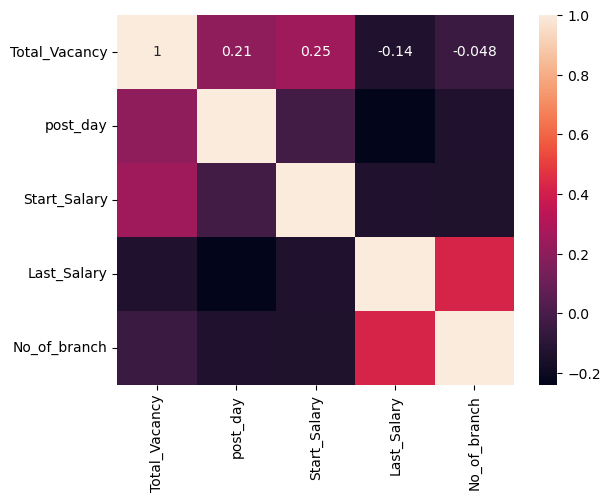

In [464]:
sns.heatmap(corr,annot=True)
plt.savefig("heatmap")
plt.show()

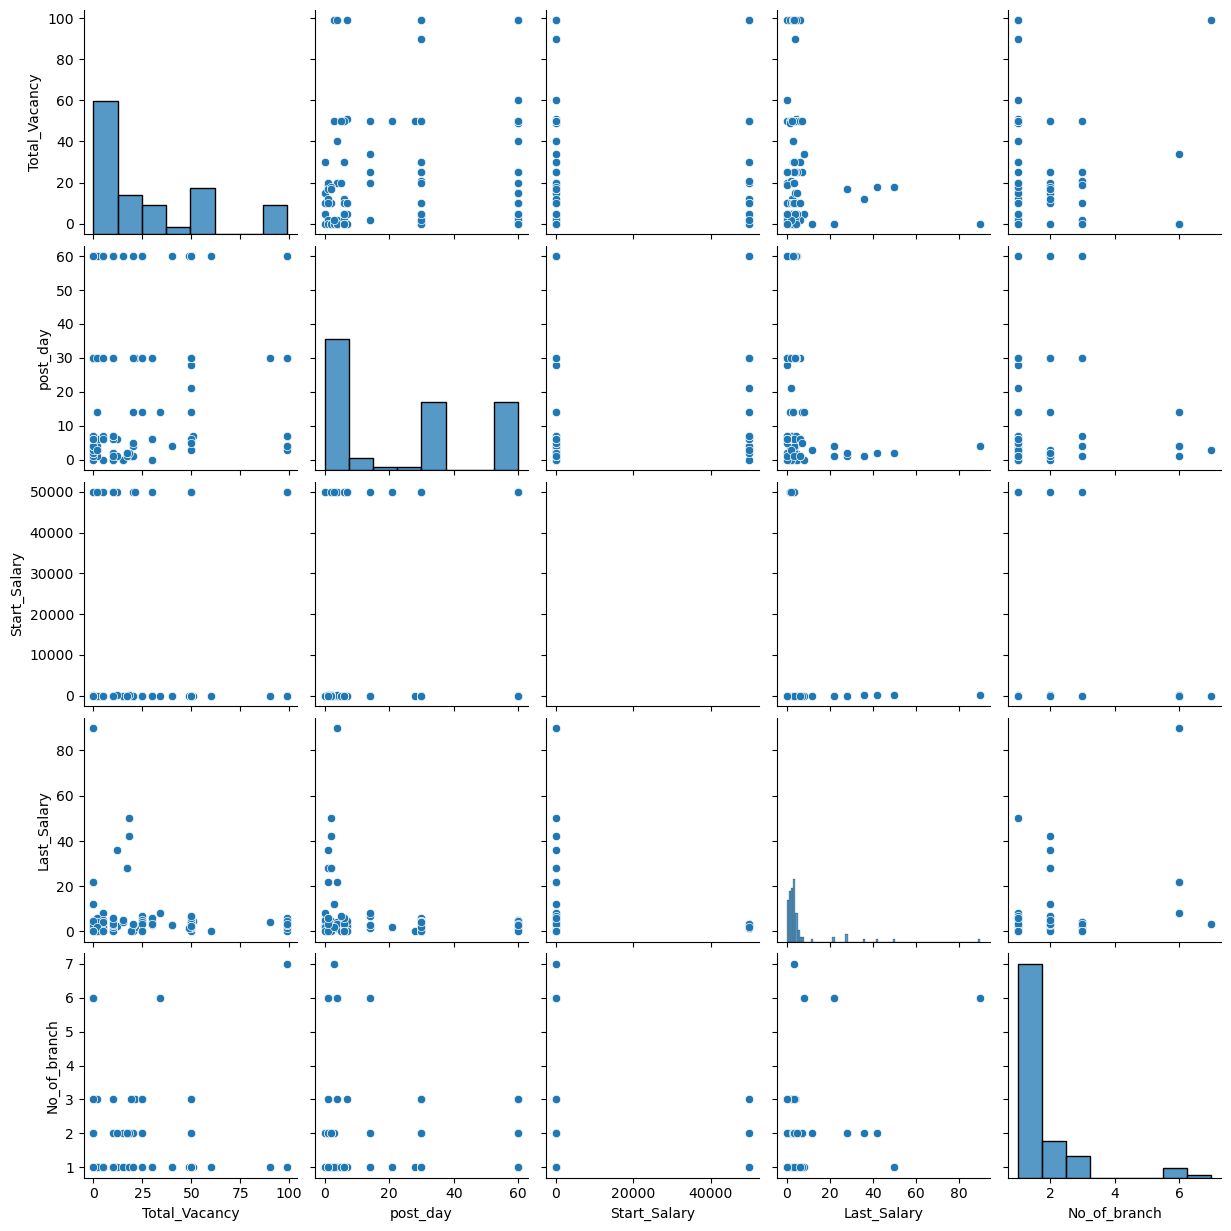

In [463]:
sns.pairplot(df)
plt.savefig("relationship")
plt.show()

# Observation:
- Total_Vacancy and post_day: There's a weak negative correlation between these two variables, suggesting that as the number of days since the post increases, the total number of vacancies might decrease slightly.
- Start_Salary and Last_Salary: These two variables have a strong positive correlation, indicating that higher starting salaries tend to be associated with higher final salaries.
- No_of_branch and Total_Vacancy: There's a weak positive correlation, suggesting that organizations with more branches might have a higher number of vacancies.

# What are the most common job titles?

In [24]:
common=df["title"].value_counts().reset_index().head(10)
common

,title,count
0,Hr Recruiter,5
1,Customer Support Representative,4
2,Customer Service Executive,3
3,Tele Caller,2
4,Sales Executive,2
5,Business Development Executive,2
6,Accounts Payable,2
7,Customer Support Specialist,2
8,Supply Chain Manager apply for Overseas now no...,2
9,International voice,1


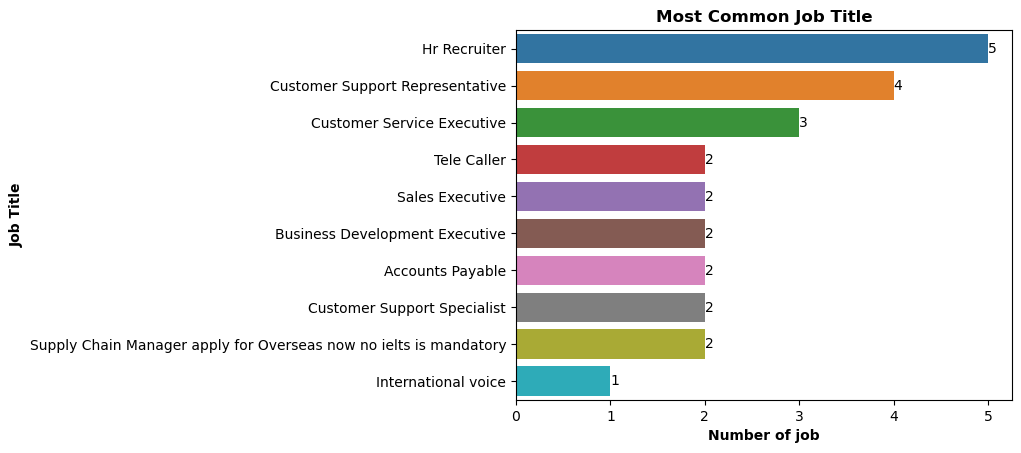

In [495]:
plt.title("Most Common Job Title",fontweight='bold')
bar1=sns.barplot(data=common,x="count",y="title")
plt.xlabel("Number of job",fontweight='bold')
plt.ylabel("Job Title",fontweight='bold')
for i in bar1.containers:
    bar1.bar_label(i)
plt.savefig("commonjobtitle")
plt.show()


# Observation: 
- Most common job title is HR recuriter 
- after that Customer Support Representative	

# Which companies have the most job openings?

In [28]:
cj=df["firm"].value_counts().reset_index().head(10)
cj

,firm,count
0,FAST AND DIRECT SERVICES,10
1,Flight To Sucess Immigration LLP,7
2,RELIANCE NIPPON LIFE INSURANCE COMPANY LIMITED,5
3,ICICI LOMBARD GENERAL INSURANCE CO. LTD.,3
4,Varda HR LLP,3
5,AVS MANPOWER CONSULTANCY PRIVATE LIMITED,3
6,Starworth Global Solutions,2
7,WORKFREAKS BUSINESS SERVICES PRIVATE LIMITED,2
8,Krazybee Services Private Limited,2
9,OMEGA HEALTHCARE MANAGEMENT SERVICES PRIVATE L...,2


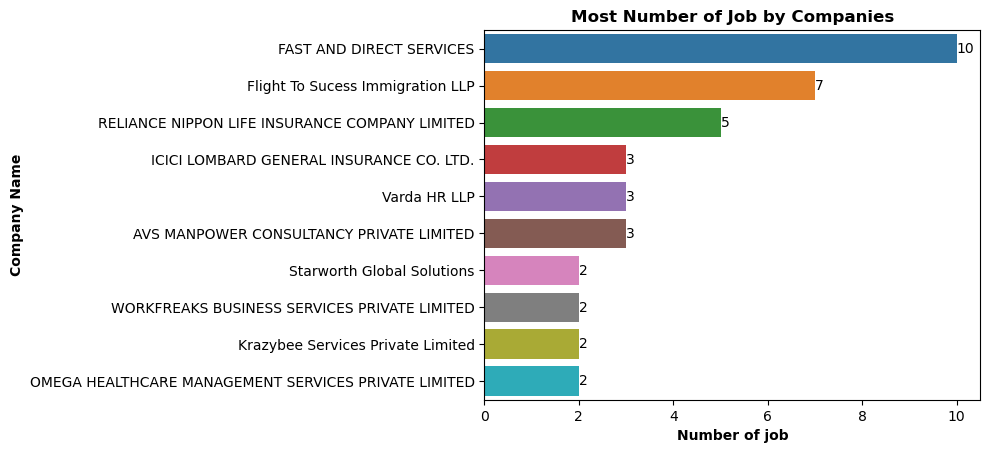

In [498]:
plt.title("Most Number of Job by Companies",fontweight='bold')
bar2=sns.barplot(data=cj,x="count",y="firm")
plt.xlabel("Number of job",fontweight='bold')
plt.ylabel("Company Name",fontweight='bold')
for i in bar2.containers:
    bar2.bar_label(i)
plt.savefig("jobcompanies")
plt.show()


# Obervation:
- Most Number of job opening are 10 from company "FAST AND DIRECT SERVICES".

# What industries are most represented in the dataset?

In [32]:
top_ind=df["Industries"].value_counts().reset_index().head(10)
top_ind

,Industries,count
0,BPO / Call Center,28
1,Insurance,13
2,Recruitment Services,10
3,Financial Services,7
4,BFSI,5
5,Medical / Healthcare,5
6,IT Services & Consulting,5
7,NBFC ( Non Banking Financial Services ),4
8,Logistics / Courier / Transportation,4
9,Education / Training,4


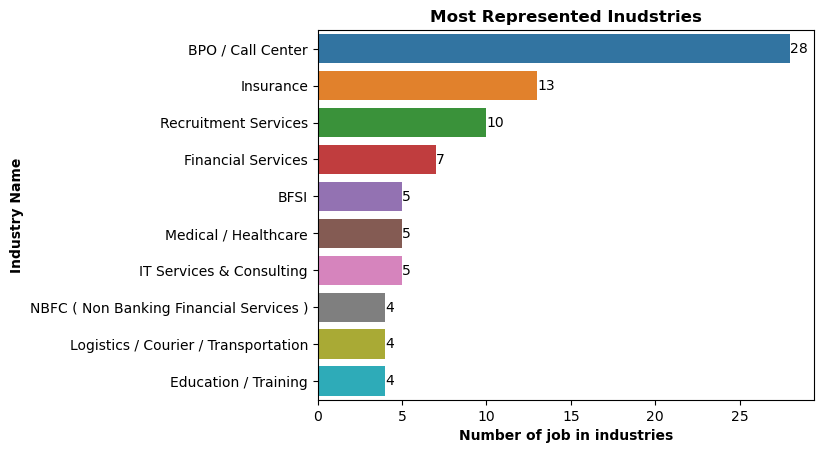

In [500]:
plt.title("Most Represented Inudstries",fontweight='bold')
bar3=sns.barplot(data=top_ind,x="count",y="Industries")
plt.xlabel("Number of job in industries",fontweight='bold')
plt.ylabel("Industry Name",fontweight='bold')
for i in bar3.containers:
    bar3.bar_label(i)
plt.savefig("industries")
plt.show()


Observation:
- BPO / Call Center	has highest number of job opening with job number 28
- and following Insurance industries has 2nd higest number of opening with job number 13

# How does required experience (exp) vary across job titles?

In [527]:
# experience_by_title = df.groupby('title')['exp'].mean().reset_index().sort_values(by='exp', ascending=False)

In [563]:
def extract_experience(exp_str):
    if isinstance(exp_str, str) and 'to' in exp_str:
        try:
            start, end = exp_str.split(' to ')
            start_year = int(start.strip())
            end_year = int(end.split()[0].strip())  # Remove the 'Yrs' part
            return (start_year + end_year) / 2  # Use the average value
        except:
            return None  # Handle cases where conversion might fail
    return None  # If not a valid range, return None

df['exp_numeric'] = df['exp'].apply(extract_experience)

experience_by_title = df.groupby('title')['exp_numeric'].mean().reset_index().sort_values(by='exp_numeric', ascending=False).head(20)



In [565]:
experience_by_title

,title,exp_numeric
30,Devops Consultant,12.50
62,Medical Representative in Portugal no ielts,7.50
58,Java Ui Developer,7.50
57,Java Back-end Developer,7.50
22,Customer Service Manager,6.50
4,Azure Compute - Windows Server Admin - Hyderab...,6.50
0,ADM - Elite Vertical,6.00
67,Operations Supervisor Accounts Receivable,6.00
98,Urgently Required HR,5.50
68,Operations Supervisor Invoicing,5.50


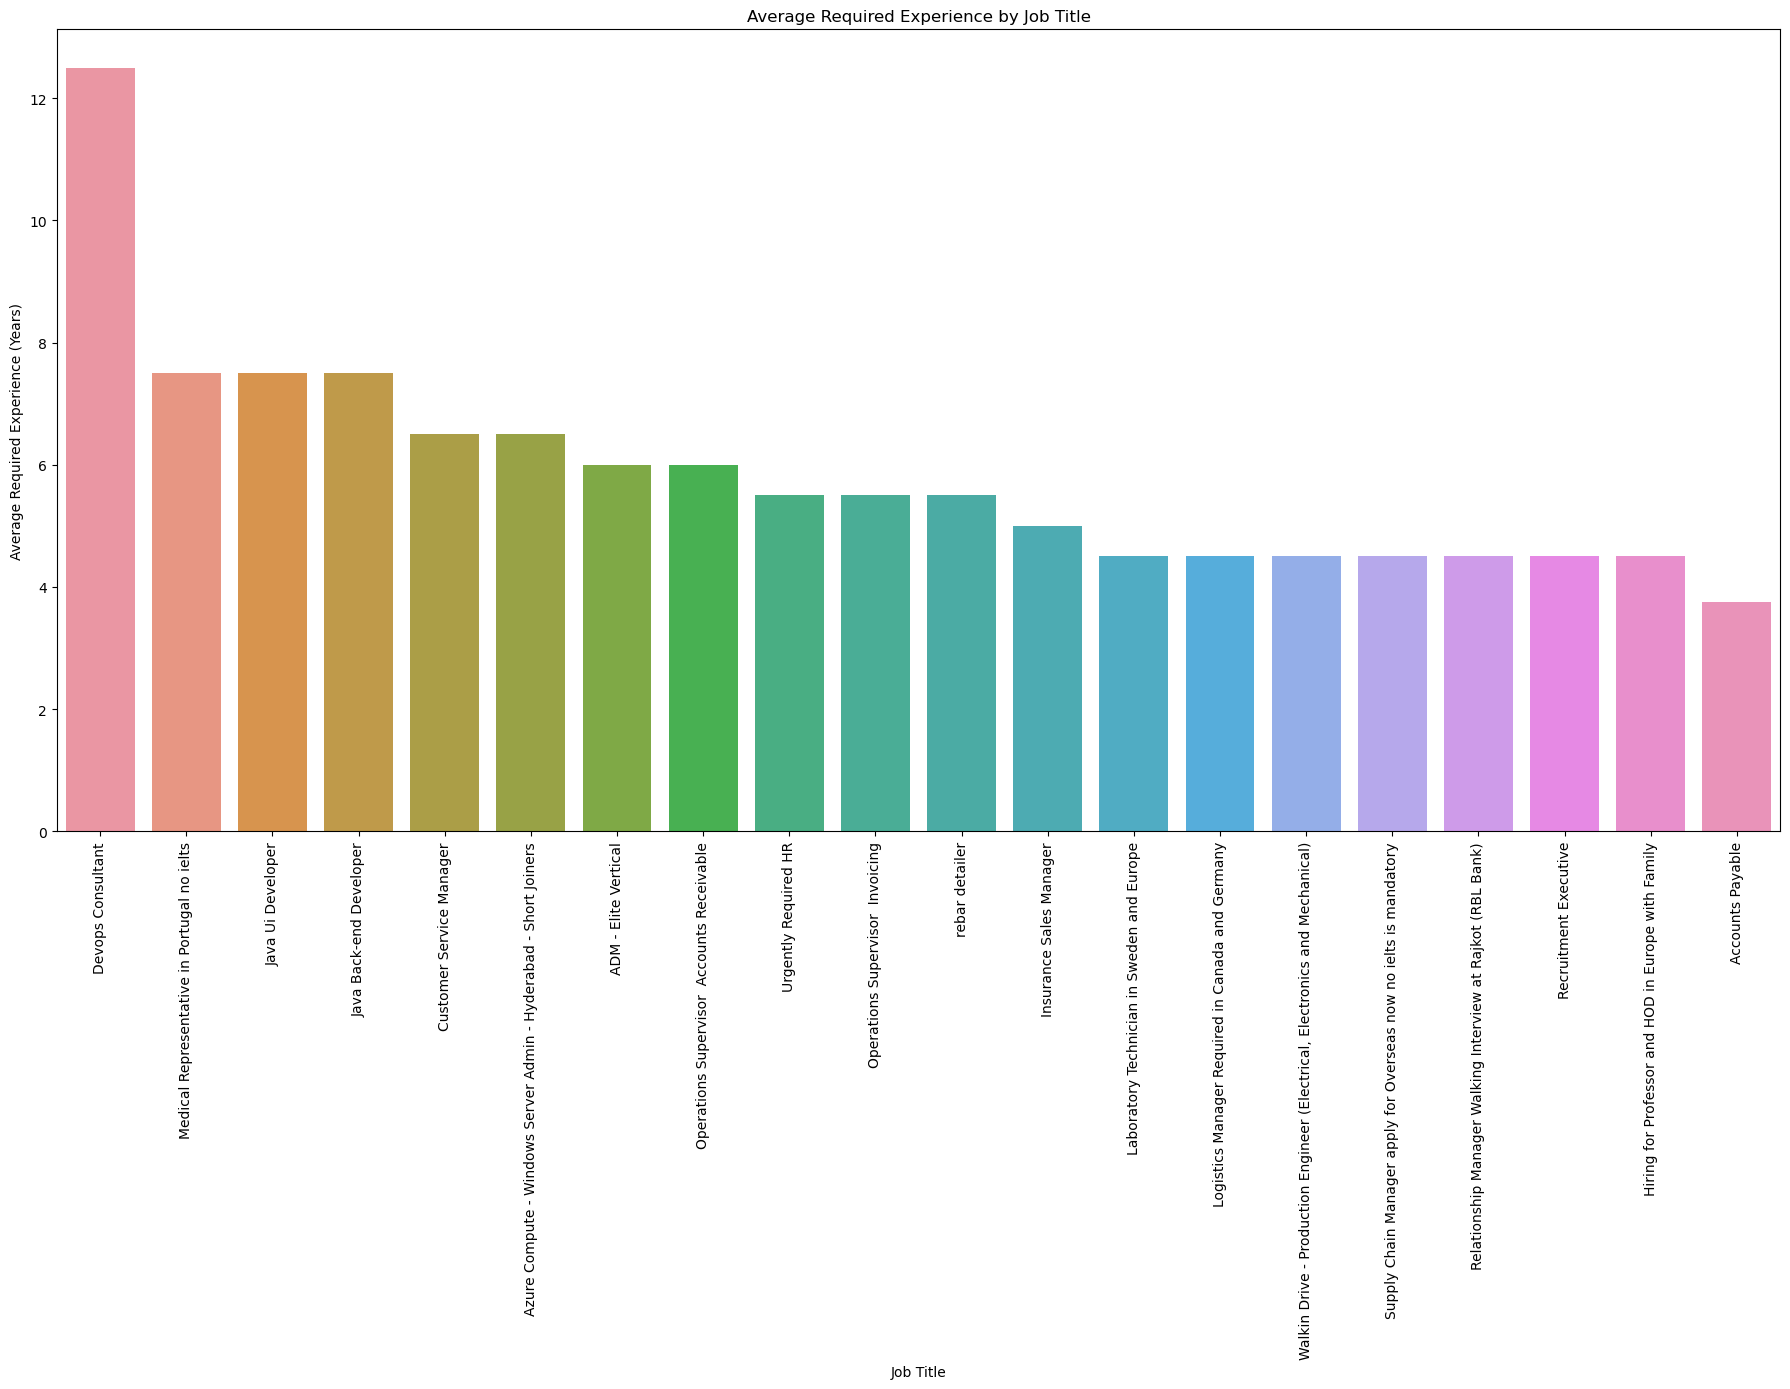

In [571]:
# Plotting the results
plt.figure(figsize=(18, 14))
sns.barplot(data= experience_by_title,x='title', y='exp_numeric')
plt.ylabel('Average Required Experience (Years)')
plt.xlabel('Job Title')
plt.title('Average Required Experience by Job Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("exp_vary")
plt.show()

# What are the most common skills listed for jobs?


In [105]:
df["Skills"]=df["Skills"].str.replace("[","").str.strip()
df["Skills"]=df["Skills"].str.replace("]","").str.strip()
df["Skills"]=df["Skills"].str.replace("'","").str.strip()

In [113]:
skills=df["Skills"].str.split(",",expand=True).stack().value_counts().reset_index().head(10)
skills

,index,count
0,customer service,17
1,customer support,10
2,communication skills,10
3,voice process,8
4,life insurance,8
5,sales,8
6,bpo,7
7,sales,7
8,negotiation skills,6
9,insurance sales,6


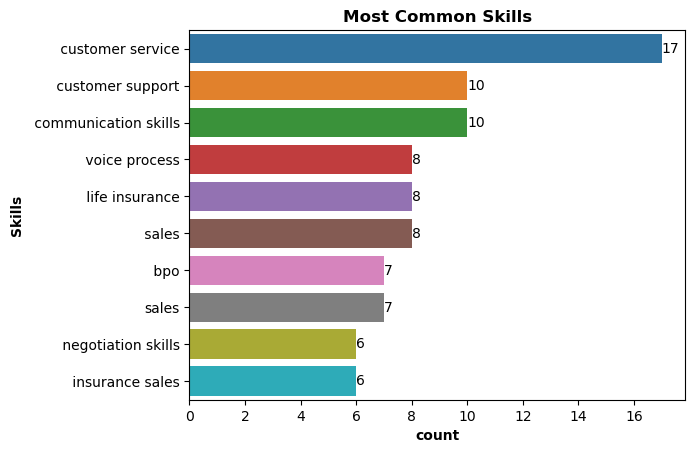

In [502]:
plt.title("Most Common Skills",fontweight='bold')
bar4=sns.barplot(data=skills,x="count",y="index")
plt.xlabel("count",fontweight='bold')
plt.ylabel("Skills",fontweight='bold')
for i in bar4.containers:
    bar4.bar_label(i)
plt.savefig("commonskill")
plt.show()


# Observation:
- most common skill are customer service to get the job
- after that customer support has second highest skill
- and following communication skills are at 3rd most common skill for job 

# How does the distribution of experience levels (e.g., "Fresher," "Experienced") look across the dataset?

In [39]:
de= df["classify_exp"].value_counts().reset_index()
de

,classify_exp,count
0,Fresher,61
1,Experienced,56


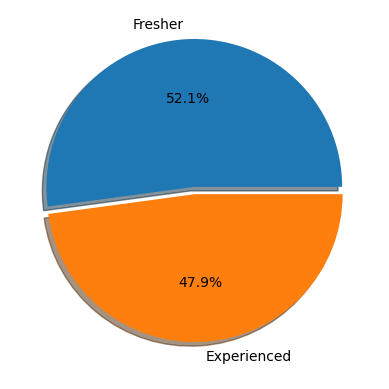

In [504]:
plt.pie(data=de,x="count",autopct="%0.1f%%",labels="classify_exp",explode = [0.05,0],shadow=True)
plt.savefig("classifyexp")
plt.show()


# Observation:
- The distribution is nearly equal, with a slight majority of job postings targeting freshers.

# What are the top locations for these job listings

In [147]:
locations=df["location"].str.replace(r'\d+', '', regex=True).str.replace('+', ', ').str.split(', ',expand=True).stack().value_counts().reset_index().head(10)
locations.rename(columns={"index":"location"},inplace=True)
locations

,location,count
0,Mumbai City,34
1,Bangalore,14
2,Hyderabad,11
3,Navi Mumbai,11
4,Chennai,10
5,Thane,9
6,Delhi,7
7,Noida,6
8,Canada,4
9,Pune,4


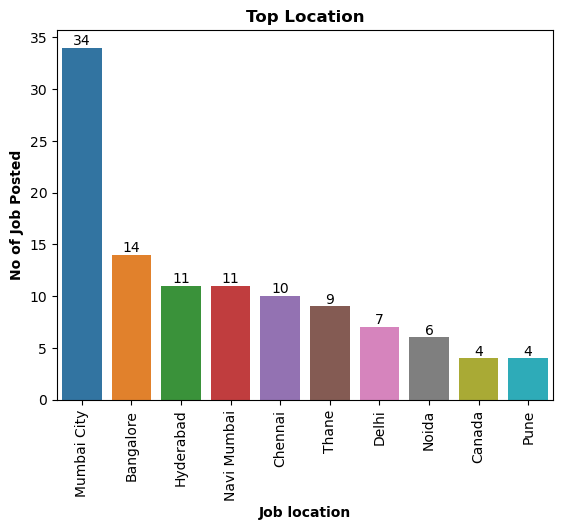

In [506]:
plt.title("Top Location",fontweight='bold')
bar5=sns.barplot(data=locations,x="location",y="count")
plt.xlabel("Job location",fontweight='bold')
plt.ylabel("No of Job Posted",fontweight='bold')
plt.xticks(rotation=90)
for i in bar5.containers:
    bar5.bar_label(i)
plt.savefig("toplocation")
plt.show()


# Observation:
- mumbai city are top location with the highest number of job 34
- after that banglore city 14 jobs and then hyderabad with 11 jobs.

# How many branches do companies typically have, and where are they located?


In [427]:
df['No_of_branch'] = pd.to_numeric(df['No_of_branch'], errors='coerce')

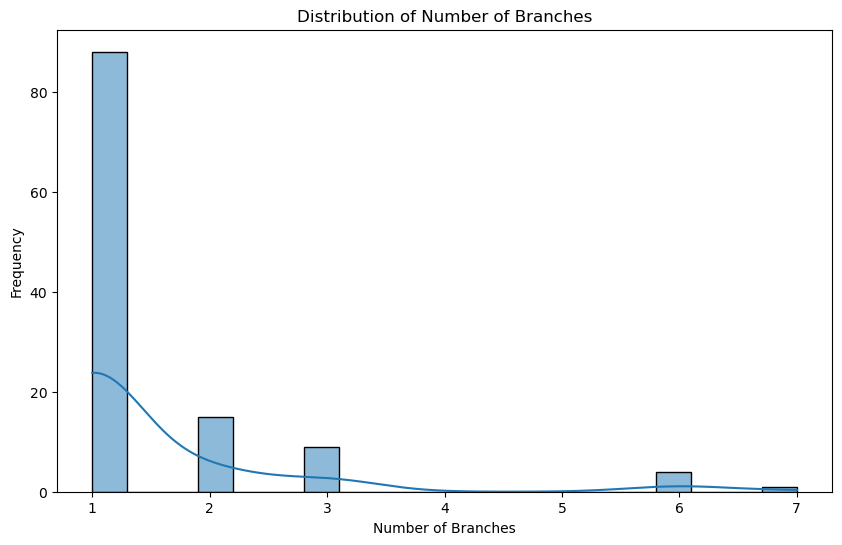

In [508]:
plt.figure(figsize=(10, 6))
sns.histplot(df['No_of_branch'].dropna(), kde=True, bins=20)
plt.title("Distribution of Number of Branches")
plt.xlabel("Number of Branches")
plt.ylabel("Frequency")
plt.savefig("noofbranch")
plt.show()


In [431]:
first_branch_location_counts = df['1st_Branch'].value_counts()

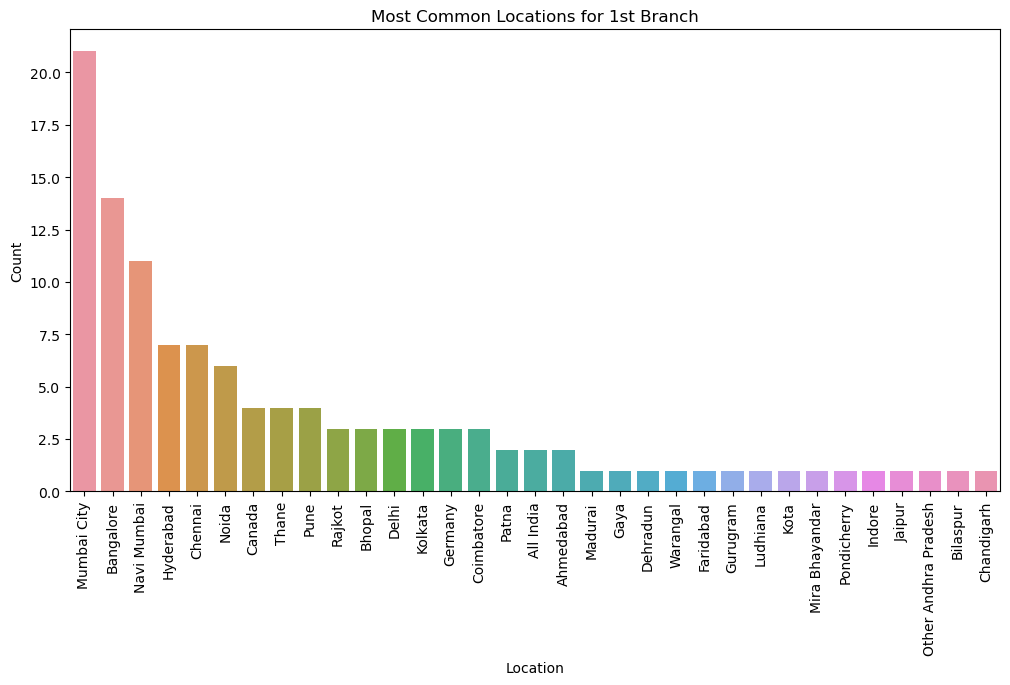

In [510]:
plt.figure(figsize=(12, 6))
sns.barplot(x=first_branch_location_counts.index, y=first_branch_location_counts.values)
plt.xticks(rotation=90)
plt.title("Most Common Locations for 1st Branch")
plt.xlabel("Location")
plt.ylabel("Count")
plt.savefig("commonlocation1stbranch")
plt.show()


In [435]:
second_branch_location_counts = df['2nd_Branch'].value_counts()

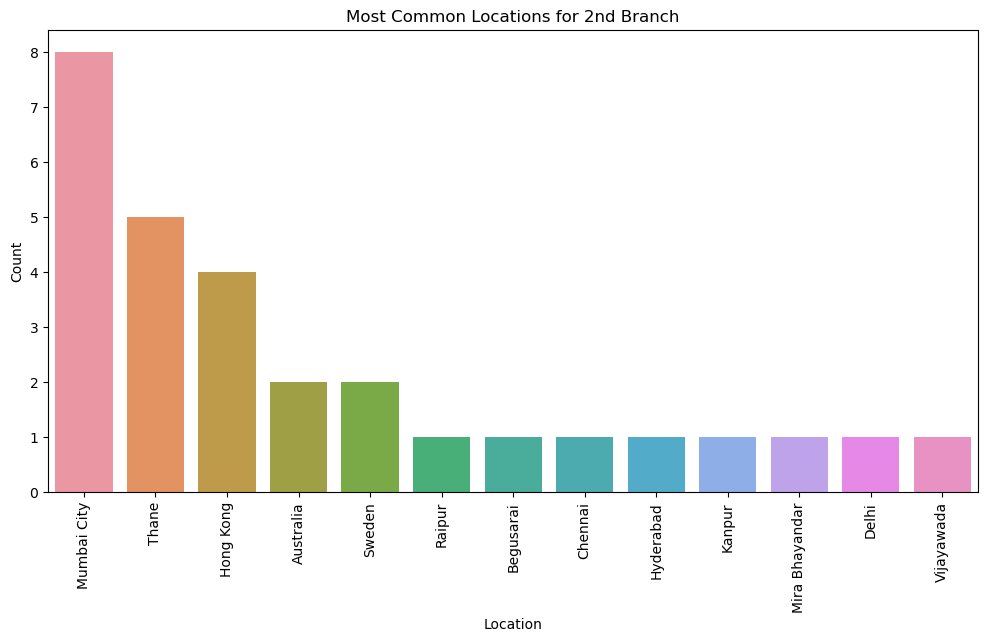

In [512]:
plt.figure(figsize=(12, 6))
sns.barplot(x=second_branch_location_counts.index, y=second_branch_location_counts.values)
plt.xticks(rotation=90)
plt.title("Most Common Locations for 2nd Branch")
plt.xlabel("Location")
plt.ylabel("Count")
plt.savefig("common2ndbranch")
plt.show()


# Observation:
- Dominance of Mumbai City: Mumbai City has the highest frequency, indicating a significant number of job postings or activities associated with this location.
- Top Cities: Bangalore, Hyderabad, and Navi Mumbai follow Mumbai City in terms of frequency, suggesting these cities are also major hubs for the activities represented in the dataset.
- Long Tail: A long tail of locations with lower frequencies is observed, indicating a diverse geographical spread of the data.

# What is the range of starting and last salaries for jobs in each industry?


In [293]:
df.groupby('Industries').agg(
    start_salary_min=('Start_Salary', 'min'),
    start_salary_max=('Start_Salary', 'max'),
    last_salary_min=('Last_Salary', 'min'),
    last_salary_max=('Last_Salary', 'max')
).reset_index()

,Industries,start_salary_min,start_salary_max,last_salary_min,last_salary_max
0,Accounting & Auditing,1.5,1.5,4.5,4.5
1,Automobile / Auto Ancillaries,1.5,1.5,2.5,2.5
2,BFSI,0.0,50000.0,0.0,4.5
3,BPO / Call Center,0.0,50000.0,0.0,6.0
4,Banking,2.5,3.5,3.5,8.0
5,Department,0.0,50000.0,0.0,5.0
6,Education / Training,1.0,50000.0,1.5,50.0
7,Engineering / Construction,1.0,3.0,2.0,4.0
8,FinTech,0.0,2.5,0.0,4.0
9,Financial Services,0.0,50000.0,0.0,4.0


# How does the salary vary with experience and job type?


In [440]:
df['Start_Salary'] = pd.to_numeric(df['Start_Salary'], errors='coerce')
df['Last_Salary'] = pd.to_numeric(df['Last_Salary'], errors='coerce')

salary_by_exp = df.groupby('classify_exp').agg(
    start_salary_min=('Start_Salary', 'min'),
    start_salary_max=('Start_Salary', 'max'),
    start_salary_avg=('Start_Salary', 'mean'),
    last_salary_min=('Last_Salary', 'min'),
    last_salary_max=('Last_Salary', 'max'),
    last_salary_avg=('Last_Salary', 'mean')
).reset_index()

salary_by_job_type = df.groupby('job_type').agg(
    start_salary_min=('Start_Salary', 'min'),
    start_salary_max=('Start_Salary', 'max'),
    start_salary_avg=('Start_Salary', 'mean'),
    last_salary_min=('Last_Salary', 'min'),
    last_salary_max=('Last_Salary', 'max'),
    last_salary_avg=('Last_Salary', 'mean')
).reset_index()


In [317]:
salary_by_exp

,classify_exp,start_salary_min,start_salary_max,start_salary_avg,last_salary_min,last_salary_max,last_salary_avg
0,Experienced,0.0,50000.0,5361.044643,0.0,50.0,6.553571
1,Fresher,0.0,50000.0,11478.065574,0.0,90.0,5.008197


In [319]:
salary_by_job_type

,job_type,start_salary_min,start_salary_max,start_salary_avg,last_salary_min,last_salary_max,last_salary_avg
0,Full time,0.0,50000.0,8192.935345,0.0,90.0,5.784483
1,Part time,50000.0,50000.0,50000.000000,1.5,1.5,1.500000


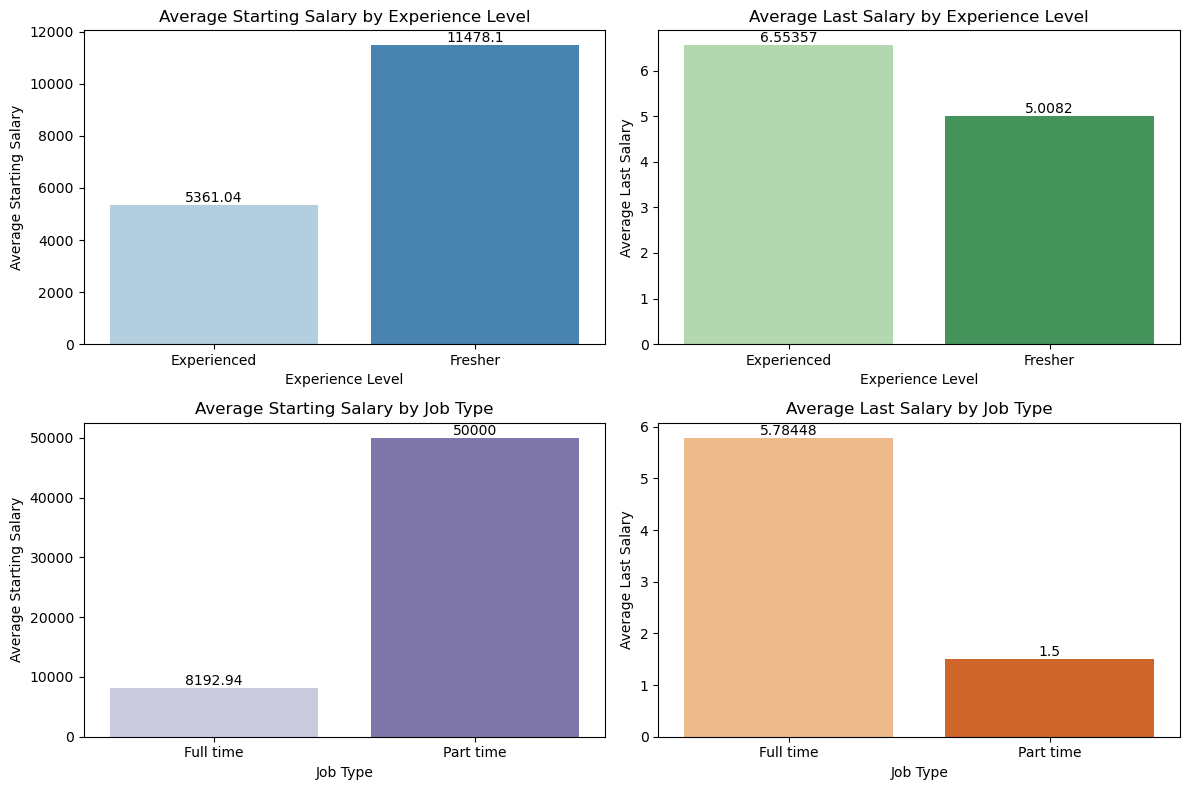

In [514]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
bar8=sns.barplot(x='classify_exp', y='start_salary_avg', data=salary_by_exp, palette='Blues')
plt.title('Average Starting Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Starting Salary')
for i in bar8.containers:
    bar8.bar_label(i)

plt.subplot(2, 2, 2)
bar9=sns.barplot(x='classify_exp', y='last_salary_avg', data=salary_by_exp, palette='Greens')
plt.title('Average Last Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Last Salary')
for i in bar9.containers:
    bar9.bar_label(i)


plt.subplot(2, 2, 3)
bar10=sns.barplot(x='job_type', y='start_salary_avg', data=salary_by_job_type, palette='Purples')
plt.title('Average Starting Salary by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Average Starting Salary')
for i in bar10.containers:
    bar10.bar_label(i)

plt.subplot(2, 2, 4)
bar11=sns.barplot(x='job_type', y='last_salary_avg', data=salary_by_job_type, palette='Oranges')
plt.title('Average Last Salary by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Average Last Salary')
for i in bar11.containers:
    bar11.bar_label(i)

plt.tight_layout()
plt.savefig("salary_vary")

plt.show()


# Observation:
- Higher Starting Salaries for Freshers: Surprisingly, freshers seem to have a higher average starting salary compared to experienced candidates. This could be due to factors like higher demand for fresh talent in specific sectors or increased salary expectations for freshers.
- Significant Salary Growth for Experienced Candidates: Experienced candidates, despite having a lower starting salary, experience a substantial increase in their last salary, indicating career progression and salary growth over time.
- Higher Salaries for Part-Time Jobs: Interestingly, part-time jobs have a higher average starting and last salary compared to full-time jobs. This could be attributed to specialized roles, higher pay rates for part-time work, or other factors.
- Limited Data Points: The lower average salary for full-time jobs might be influenced by a smaller sample size or a specific set of job roles.


# What proportion of jobs are full-time versus other types?


In [329]:
job_type=df["job_type"].value_counts().reset_index()
job_type

,job_type,count
0,Full time,116
1,Part time,1


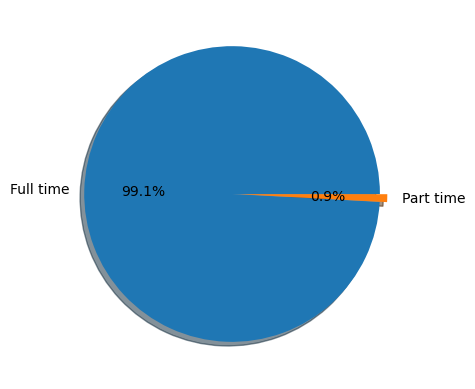

In [487]:
plt.pie(data=job_type,x="count",labels="job_type",autopct="%0.1f%%",explode = [0.05,0],shadow=True)
plt.savefig("jobtype")
plt.show()

# Observation:
- Dominance of Full-Time Roles: A significant majority of the job postings (99.1%) are for full-time positions.
- Minority of Part-Time Roles: Only 0.9% of the job postings are for part-time positions.



# What departments have the most job openings?    


In [448]:
most_job=df["Department"].str.replace(r'([a-z])([A-Z])', r'\1 \2', regex=True).value_counts().reset_index().head(10)
most_job

,Department,count
0,Sales / BD,17
1,Customer Service (Domestic),9
2,Customer Service (International),7
3,Customer Service (Domestic)Customer Service (I...,6
4,Customer Service (International)Customer Servi...,5
5,HR,4
6,Application Programming / Maintenance,4
7,HRRecruitment,4
8,Pre-Sales Sales / BD,3
9,Finance / Accounts / Tax,2


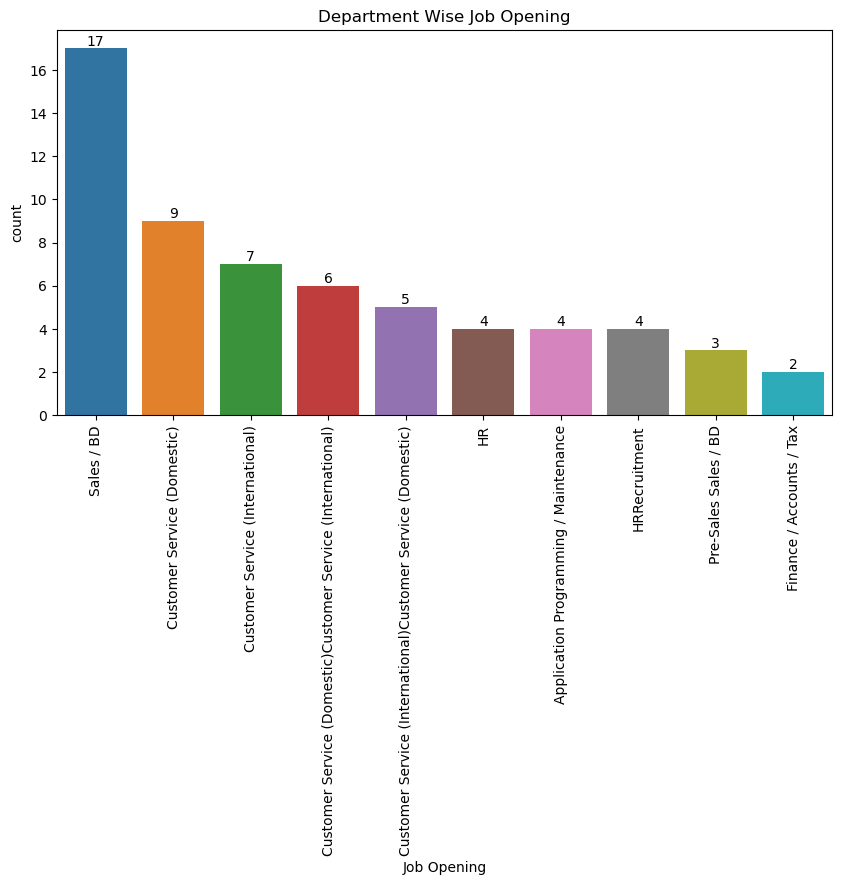

In [489]:
plt.figure(figsize=(10,5))
plt.title("Department Wise Job Opening")
jobs=sns.barplot(data=most_job,x="Department",y="count")
plt.xlabel("Job Opening")
plt.xticks(rotation=90)
for container in jobs.containers:
    jobs.bar_label(container, fmt='%.0f')
plt.savefig("department_job")
plt.show()

# Observation:
- Sales/BD: This department has the highest number of job openings, indicating a significant demand for sales and business development professionals.
- Customer Service: Both domestic and international customer service departments have a substantial number of openings, suggesting a need for customer support personnel.
- HR and HR Recruitment: The HR department and HR recruitment roles have a moderate number of openings, indicating ongoing hiring needs for human resources professionals.
- Technical Roles: Departments like Application Programming/Maintenance and Pre-Sales Sales/BD have a fewer number of openings, suggesting a lower demand for technical roles compared to sales and customer service.
- Finance and Accounts: The Finance/Accounts/Tax department has the lowest number of openings, indicating a relatively stable staffing requirement in this area.

# Are there patterns in the number of vacancies across different job titles?


In [397]:
vacancies_by_title = df.groupby('title')['Total_Vacancy'].sum().reset_index().sort_values(by='Total_Vacancy', ascending=False)
vacancies_by_title

,title,Total_Vacancy
28,Customer Support Representative,170
29,Customer Support Specialist,149
21,Customer Service Executive,124
83,Sales Executive (Freshers Welcome),99
56,Iti Trainee,99
...,...,...
71,Purchase Executive,0
39,HR Trainee & Recruiter for Recruitment firm at...,0
68,Operations Supervisor Invoicing,0
67,Operations Supervisor Accounts Receivable,0


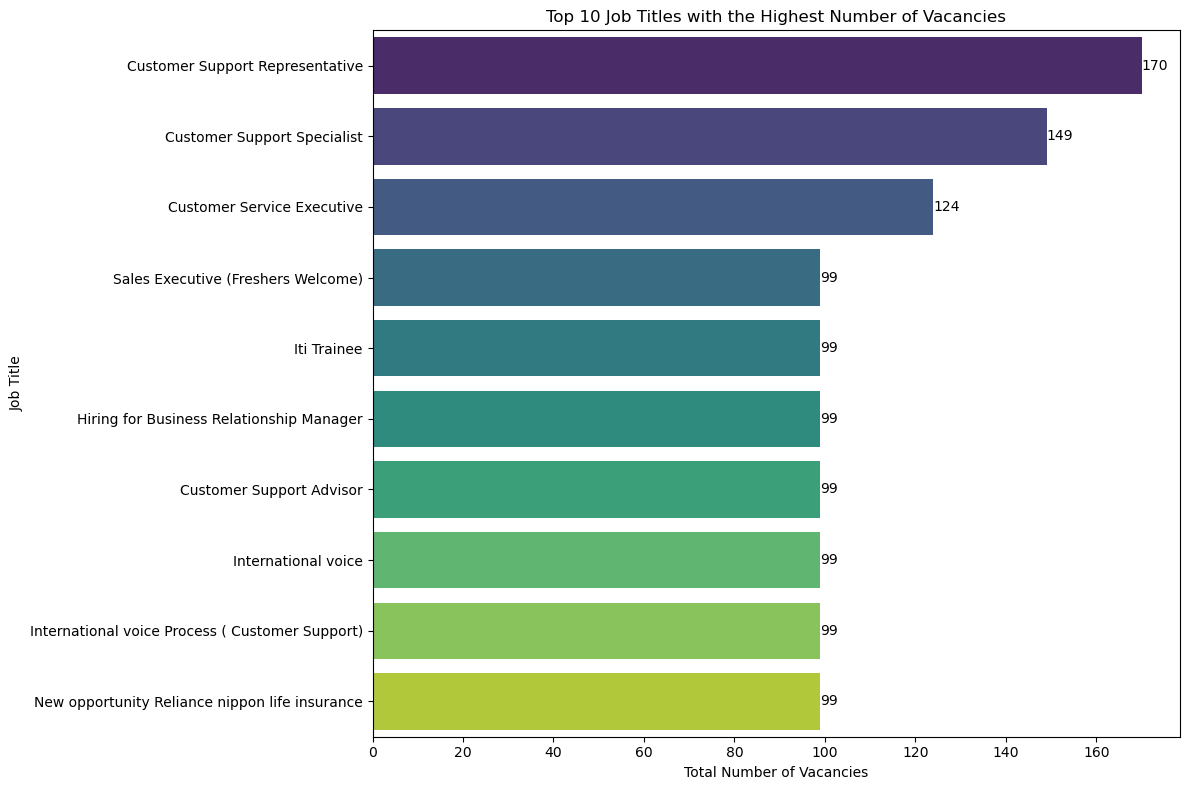

In [491]:
plt.figure(figsize=(12, 8))
bar6=sns.barplot(x='Total_Vacancy', y='title', data=vacancies_by_title.head(10), palette='viridis')
plt.title('Top 10 Job Titles with the Highest Number of Vacancies')
plt.xlabel('Total Number of Vacancies')
plt.ylabel('Job Title')
plt.tight_layout()
for i in bar6.containers:
    bar6.bar_label(i)
plt.savefig("vaccancy_pattern")
plt.show()

# Observation:
- Customer Support Dominance: Customer support roles, such as Customer Support Representative, Specialist, and Executive, are among the top job titles with the highest number of vacancies. This suggests a significant demand for customer support professionals.
- Sales and Business Development: Sales Executive (Freshers Welcome) and Hiring for Business Relationship Manager indicate a need for sales and business development talent.
- IT and Technical Roles: While not as prominent as customer support roles, there are vacancies for IT-related positions like IT Trainee and International Voice Process roles.

# What tags are most associated with high-demand jobs?
 

In [395]:
vacancies_by_tag = df.groupby('Tags')['Total_Vacancy'].sum().reset_index().sort_values(by="Total_Vacancy",ascending=False)
vacancies_by_tag

,Tags,Total_Vacancy
0,Not Available,598
10,customer service,514
19,hiring,267
36,tele customer service,235
30,sales,229
17,facility management,99
37,"tele customer service, customer service",99
32,"sales, insurance broking, finance",99
1,"accounting, finance",99
13,customer support,99


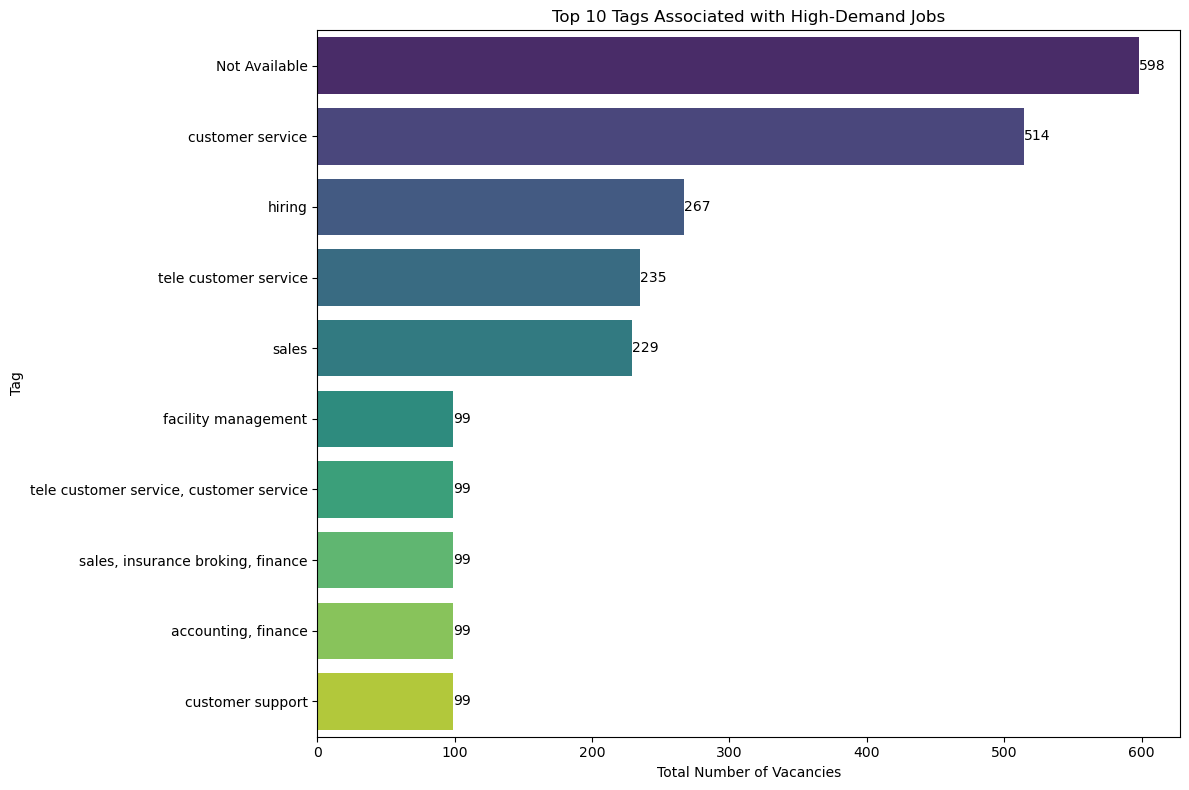

In [493]:
plt.figure(figsize=(12, 8))
bar7=sns.barplot(x='Total_Vacancy', y='Tags', data=vacancies_by_tag.head(10), palette='viridis')
plt.title('Top 10 Tags Associated with High-Demand Jobs')
plt.xlabel('Total Number of Vacancies')
plt.ylabel('Tag')
plt.tight_layout()
for i in bar7.containers:
    bar7.bar_label(i)
plt.savefig("high_demand_tags")
plt.show()

# Observation:
- "Not Available" Tag Dominates: The tag "Not Available" has the highest number of vacancies, indicating a significant number of job postings without specific tag information.
- Customer Service and Related Tags: Tags like "customer service," "tele customer service," and "customer support" are prominently featured, suggesting a high demand for customer service professionals.
- Sales and Finance: Tags related to sales, insurance broking, finance, and accounting also appear in the top 10, indicating a need for professionals in these domains.
- Facility Management: This tag, though less frequent, still represents a notable number of vacancies.